<center>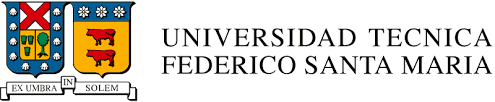</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477/577 Redes Neuronales Artificiales - 2022-2 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Redes Densas Feed Forward
* Regularización y Dropout
* Vanishing Gradient
* Learn Rate Decay
* Optimizadores


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<maryon.morales@sansano.usm.cl>, <sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-395/477/577-2022-2 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" y "maryonmorales" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 07 de Octubre, en horario de clases.
* Fecha de entrega: 08 de Octubre. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>


* 1 - Redes Feed Forward para predicción de diabetes.

La tarea tiene ejemplos de códigos con los cuales pueden guiarse en gran parte, sin embargo, solo son guias y pueden ser creativos al momento de resolver la tarea. Soluciones creativas o elegantes serán valoradas. También en algunas ocaciones se hacen elecciones arbitrarias, ustedes pueden realizar otras elecciones con tal de que haya una pequeña justificación de por qué su elección es mejor o equivalente.
Recuerden intercalar su código con *comentarios* en celdas _Markdown_, con los comentarios de la pregunta y con cualquier análisis, fórmula (en $ \LaTeX $) o explicación que les parezca relevante para justificar sus procedimientos. *No respondan las preguntas en comentarios en el código*.
Noten que en general cuando se les pide elegir algo o proponer algo no se evaluará tanto la elección en si. En cambio la argumentación detrás de la elección será lo más ponderado.
Si algún modelo se demora demasiado en correr en su máquina, no olvide que puede correr _Jupyter Notebooks_ en _Collab_ de Google, incluso con la opción de aceleración con GPU (particularmente útil para los modelos más grandes), esto puede ser relevante para las máquinas más lentas al momento de realizar exploraciones con _K-folds_ o las redes más grandes. Existe también la posibilidad de utilizar _Google Cloud Plataform_ o _Amazon Web Service_, donde tienen máquinas aceleradas con GPU; maquinas ya configuradas para _deep leraning_ pueden encontrarse en el _Marketplace_ de cada proveedor de servicios.

# 1 - Redes Feed Forward para predicción de diabetes

De las redes neuronales artificiales más simples se encuentran las redes densas o Feed Forward, donde todas las neuronas de una capa estan conectadas a todos los inputs y envían su señal de activación a todas las neuronas de la siguiente capa. Estas redes, si bien son las más simples, suelen tener desempeños bastante buenos, y en muchas aplicaciones reales son utilizadas, ya sea por si solas o en combinación con otros modelos. Además, son las redes donde más facil se pueden observar muchos de los fenómenos que se han descubierto a lo largo de los años de desarrollo de esta area del conocimiento, tanto por ser de las redes vigentes más antiguas y por su estructura relativamente simple. En esta primera parte de la tarea exploraremos las redes densas y algunos de sus hiperparámetros más relevantes como la profundidad, el número de unidades; estudiaremos también algunos métodos de regularización y evidenciaremos el problema del vanishing gradient y el exploding gradient, viendo también algunos optimizadores existentes.

Para realizar esto, utilizaremos una base de datos de variables médicas predictoras de la diabetes en mujeres y la variable objetivo (presencia o ausencia de diabetes), la cual se encuentra disponible en Kaggle, en la siguiente URL: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database. Las variables predictoras incluyen el número de embarazos que ha tenido la paciente, su IMC, el nivel de insulina, la edad, entre otros. Nuesta tarea durante esta pregunta será predecir si la persona tiene o no de diabetes a partir de algunas de las otras variables presentes en el dataset. Para esto primero deberán explorar los atributos del dataset, imputar los valores que falten o eliminarlos en caso que estime conveniente, y luego preprocesar los datos de forma eficiente para que así puedan ser utilizados por una red neuronal. Una vez separados los datos de entrenamiento, validación y test, procederemos a entrenar diferentes modelos, comparandolos y evaluando sus desempeños.

## 1.a Carga de datos y primeros análisis
Para cargar los datos, puede descargarlos desde el link de Kaggle, o puede descargarlos desde su jupyter nootebok como muestra el código a continuación. Para obtener más información acerca de como descargar datasets directamente desde la API de Kaggle puede dirigirse a la documentación que se encuentra en el siguiente link: https://github.com/Kaggle/kaggle-api#download-dataset-files. Para usar la API de Kaggle dentro de Google Colab puede serle de utilidad el siguiente link: https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2.

In [1]:
# !pip install kaggle --upgrade
# !kaggle datasets download -d uciml/pima-indians-diabetes-database

In [2]:
# import zipfile
# with zipfile.ZipFile('./data/pima-indians-diabetes-database.zip', 'r') as zip_ref:
#     zip_ref.extractall('./data/')

Luego de descomprimir el archivo descargado cargue los datos en un *Dataframe* como muestra el código. Explore superficialmente los datos utilizando los metodos .head, .describe o .info del *Dataframe*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from random import random
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LeakyReLU
import tensorflow as tf
import os
from keras.callbacks import LearningRateScheduler
os.environ['AUTOGRAPH_VERBOSITY'] = "0"

df = pd.read_csv("./data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Identifique y comente sobre las características de la variable objetivo (target) que sean relevantes para el problema. ¿Que puede decir acerca de la distribución de las clases?, ¿Están balanceadas? Explique usando gráficos que le parezcan pertinentes para representar el balance de clases. 



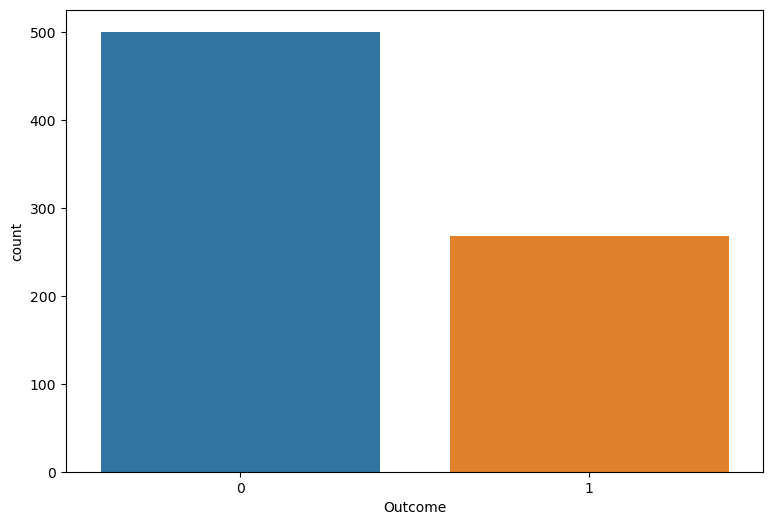

In [4]:
plt.figure(figsize = (9,6))
sns.countplot(data=df, x='Outcome')
plt.show()

Creemos que esta forma de vizualizar la información nos da una buena forma de las proporciones, pero creemos que la podemos mejorar, por lo que construimos un grafico de torta.

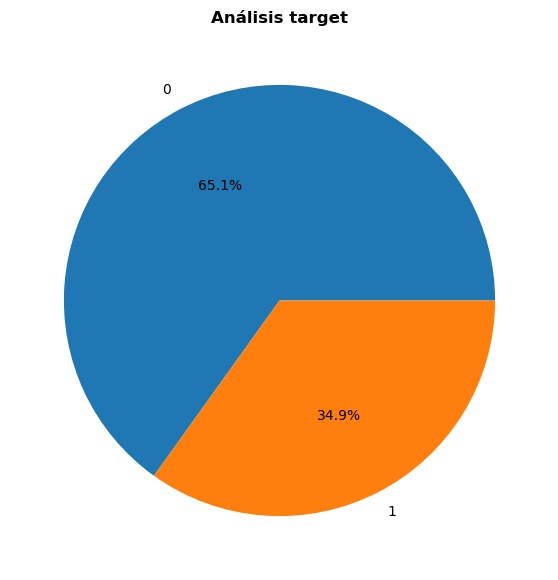

In [5]:
many = list(df.groupby(by = "Outcome").count()["Pregnancies"])
labels = df.groupby(by = "Outcome").count().index.tolist()
plt.figure(figsize = (7, 7))
plt.pie(many, labels = labels, autopct='%0.0001f%%')
plt.title("Análisis target", fontweight="bold")
plt.show()

Podemos ver que el target se distribuye entre dos tercios con 0 y un tercio con 1, con lo que vemos que el Output es una variable que cuenta con un buen balance.

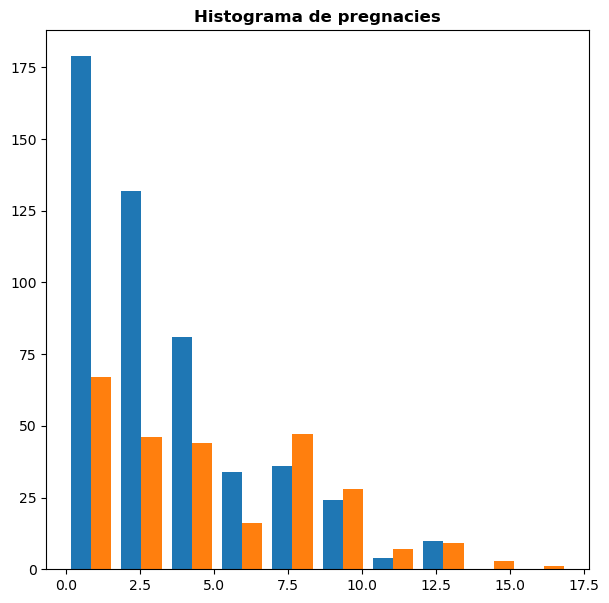

In [6]:
import seaborn as sns
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].Pregnancies, df[df.Outcome != 0].Pregnancies])
plt.title("Histograma de pregnacies", fontweight="bold")
plt.show()

Este grafico muestra que existe cierta tendencia a que mientras mayor sea la variable Pregnacies, más factible es tener 1 en la variable Outcome

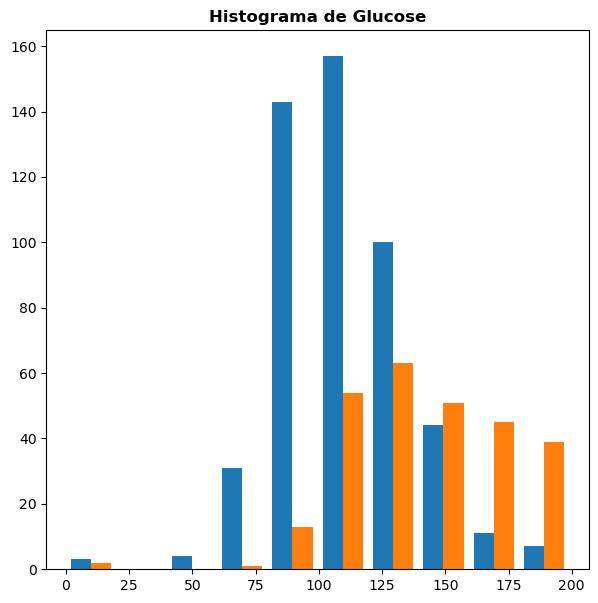

In [7]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].Glucose, df[df.Outcome != 0].Glucose])
plt.title("Histograma de Glucose", fontweight="bold")
plt.show()

Este grafico muestra que existe cierta tendencia a que mientras mayor sea la glucosa, probable es tener 1 en la variable Outcome. De hecho los "centros" de las varibles estan en distintos puntos.

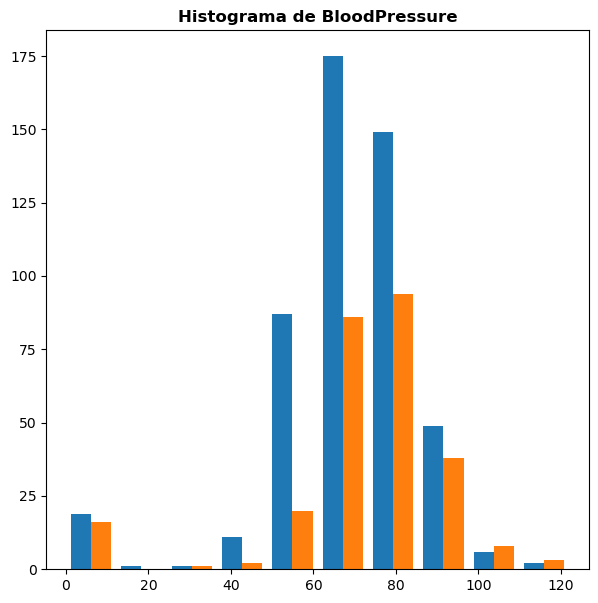

In [8]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].BloodPressure, df[df.Outcome != 0].BloodPressure])
plt.title("Histograma de BloodPressure", fontweight="bold")
plt.show()

Este grafico muestra que existe cierta tendencia a que mientras mayor sea la glucosa, probable es tener 1 en la variable Outcome.

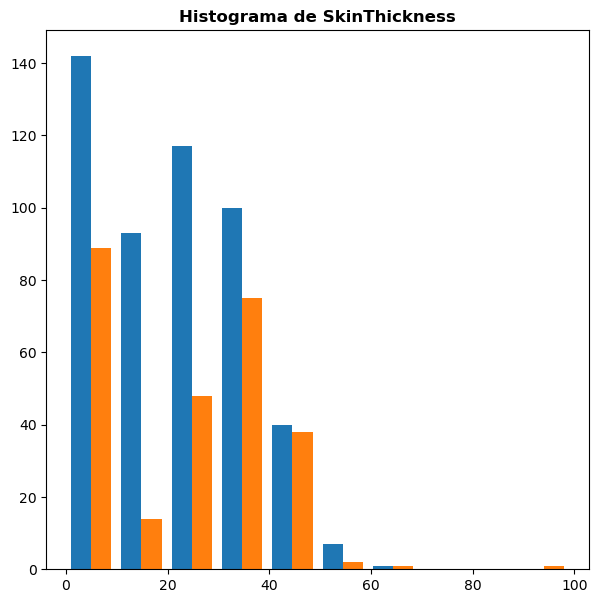

In [9]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].SkinThickness, df[df.Outcome != 0].SkinThickness])
plt.title("Histograma de SkinThickness", fontweight="bold")
plt.show()

Con este grafico no podemos evidenciar una clara tendencia para la causalidad. Algo destacable es que la variable esta notoraiamente distribuida entre 0 y 50.

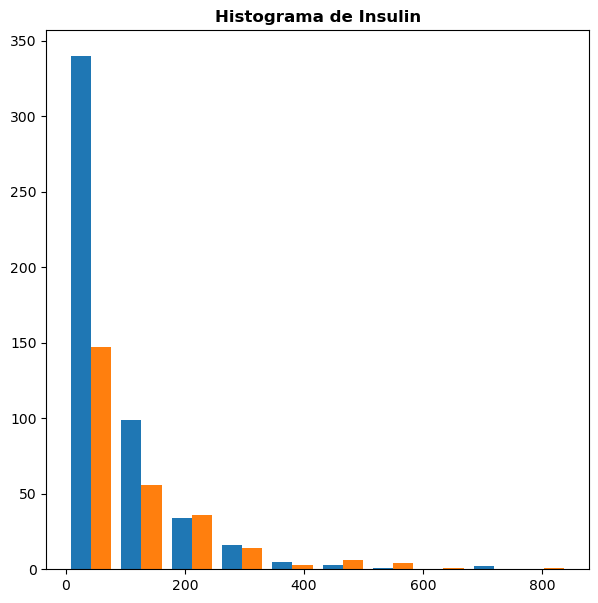

In [10]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].Insulin, df[df.Outcome != 0].Insulin])
plt.title("Histograma de Insulin", fontweight="bold")
plt.show()

Para la variable insulin evidenciamos que el aumento de la misma va disminuyendo de gran manera la presencia de outcome 0. Vemos que la variable esta cargada a la izquierda.

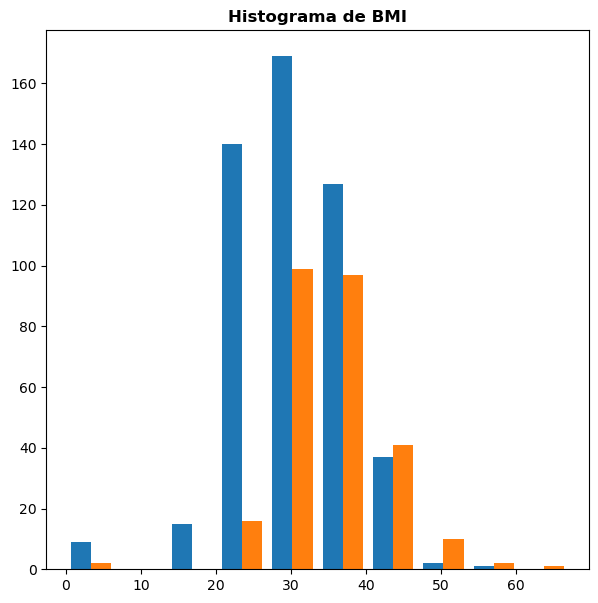

In [11]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].BMI, df[df.Outcome != 0].BMI])
plt.title("Histograma de BMI", fontweight="bold")
plt.show()

Podemos ver que la variable BMI tiene un notorio cambio de comportamiento si hacemos una estratificación por outcome. Esta variable pareciera tener dos centros, si hicieramos un analogo a una distribución gauseana podemos ver distintas medias según la estratificación por Outcome.

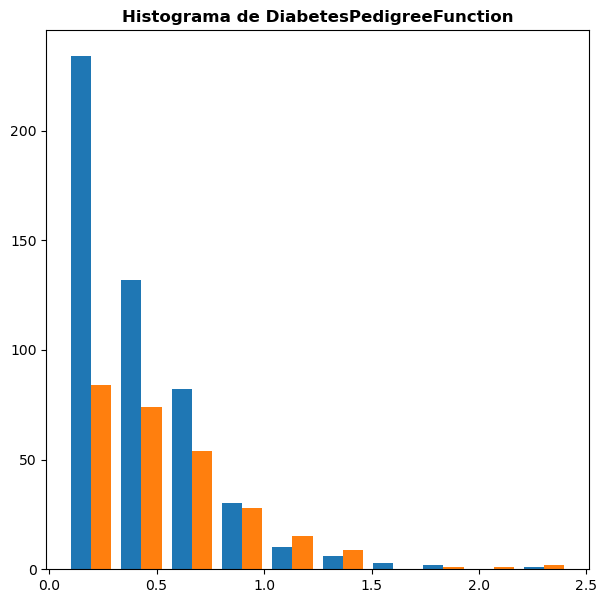

In [12]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].DiabetesPedigreeFunction, df[df.Outcome != 0].DiabetesPedigreeFunction])
plt.title("Histograma de DiabetesPedigreeFunction", fontweight="bold")
plt.show()

Aunque notamos más presencia de outcome 0 en los menores cuando es menor el valor de DiabetesPedigreeFunction y una mayor prescencia de Outcome 1 al superar el 1, no genera una estratificación muy marcada, pues ambos están presentes en todo el dominio de la variable. Evidenciamos que la variable esta cargada para el cero.

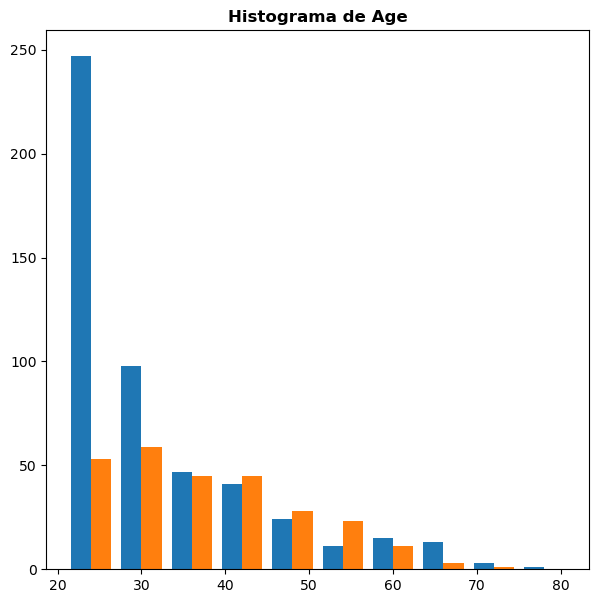

In [13]:
plt.figure(figsize = (7, 7))
plt.hist([df[df.Outcome == 0].Age, df[df.Outcome != 0].Age])
plt.title("Histograma de Age", fontweight="bold")
plt.show()

La edad pareciera sufrir el mismo efecto que el anterior para edad menor a 30 años, luego las proporciones se entremesclan de gran manera, aunque podemos ver que la variable esta cargada hacia la izquierda.

In [14]:
X_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

pd.melt(df.reset_index()[df['Outcome'] != 0], id_vars = 'index' , var_name="features", value_name='value')


,index,features,value
0,0,Pregnancies,6.0
1,2,Pregnancies,8.0
2,4,Pregnancies,0.0
3,6,Pregnancies,3.0
4,8,Pregnancies,2.0
...,...,...,...
2407,755,Outcome,1.0
2408,757,Outcome,1.0
2409,759,Outcome,1.0
2410,761,Outcome,1.0


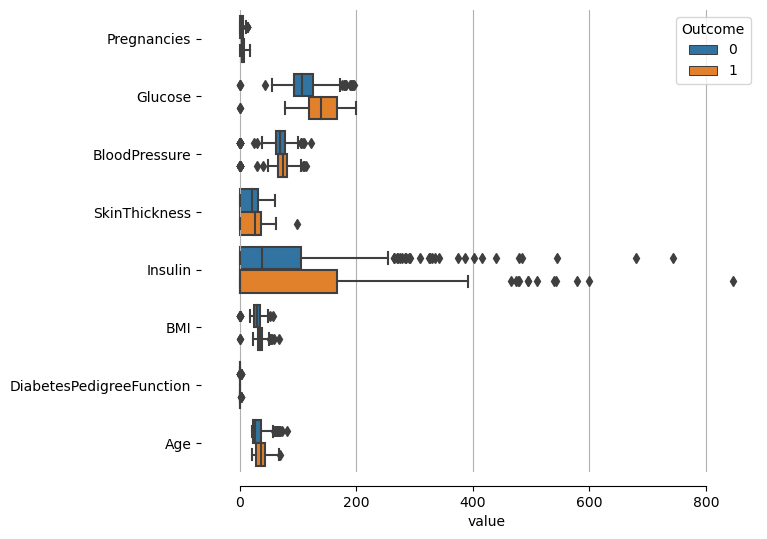

In [15]:
melted_df = pd.melt(df.reset_index(), id_vars = ['index', 'Outcome'] , var_name="features", value_name='value')

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="value", y="features", 
            hue="Outcome",
            data=melted_df)
sns.despine(offset=10, trim=True)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

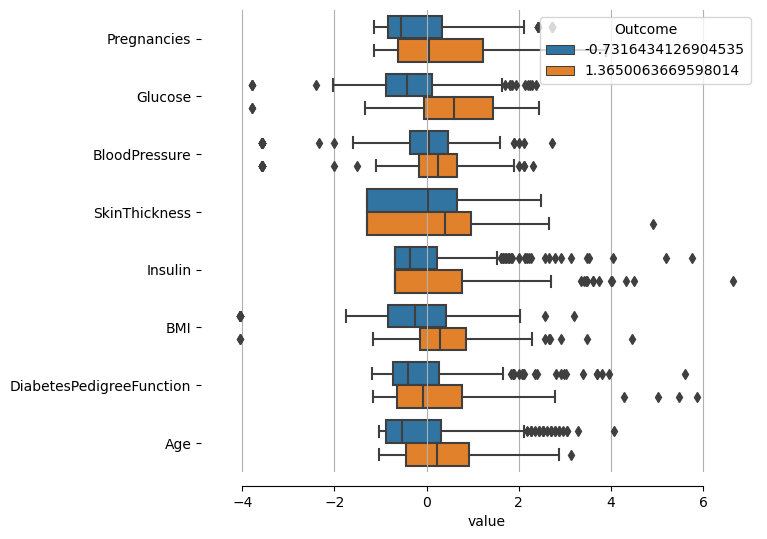

In [16]:
melted_df = pd.melt((df.reset_index()-df.reset_index().mean())/df.reset_index().std(), id_vars = ['index', 'Outcome'] , var_name="features", value_name='value')

f, ax = plt.subplots(figsize=(7, 6))

sns.boxplot(x="value", y="features", 
            hue="Outcome",
            data=melted_df)
sns.despine(offset=10, trim=True)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Recordemos que nos han consultado lo siguiente:

Identifique y comente sobre las características de la variable objetivo (target) que sean relevantes para el problema. ¿Que puede decir acerca de la distribución de las clases?, ¿Están balanceadas? Explique usando gráficos que le parezcan pertinentes para representar el balance de clases. 

$\textbf{R:}$ Respecto al balance de las clases del target, sabemos que el 65.1% son 1 y el 34.9% restante es 0. Con lo que la variable pareciera estar bastante balanceda. De igual manera realizamos un analisis exploratorio dentro de las otras variables para evaluar el balance de las mismas y si habían cambios significativos al realizar una estratificación por la misma, el cual en muchos casos resulto ser así, el grafico anterior, el de los boxplot muestra que las medianas en algunas variables como Glucose son significativamente distintas, mientras que por el contrario SkinThickness no lo es tanto. Hay que destacar que la variables están normalizadas.



¿Qué puede observar de los datos, tiene sentido que algunos valores de ciertas variables predictoras tengan valor 0?, 

Identifique cuales son las columnas con datos faltantes que fueron imputadas con el valor 0. ¿Tiene sentido estos atributos tengan valores 0? Investigue el rango de valores que puede tomar cada atributo en el dataset, y comente sus principales características.

$\textbf{R:}$ Para esto, repitamos el describe, con el que obtendremos que variables tienen valor 0.

In [17]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Respecto a la pregunta de que variables tienen sentido al tener valor 0 se encuentran la siguiente variable:

* Pregnacies := Numero de embarazos.

Por el contrario las que no tienen sentido al tener valor 0 son las siguientes:

* Glucose := Glucosa en el cuerpo
* BloodPressure := Presión sanguinea
* SkinThickness	:= Grosor de la piel
* Insulin := Nivel de insulina en el cuerpo
* BMI := Indice de masa corporal

Todas estas variables son de naturaleza mayor a 0.

## 1.b Train Test Split

En esta pregunta nos ocuparemos de separar el dataset en los conjuntos de entrenamiento, validación y test y estandarizar los datos. Para esto puede utilizar la librería sklearn, en particular la función `train_test_split`. Para esto separe primero el dataset en  $X$  e  $Y$. Luego separe los datos considerando un  70%  de ellos para entrenamiento, un  20%  para validación y un  10%  para test. ¿Qué estamos tratando de representar en esta separación en conjuntos de entrenamiento, validación y test?

$\textbf{R:}$ Se busca que la mayor parte de la data se utilice para entrenar los modelos (training set), una parte menor, pero igual significativa para poder hacer los ajustes en los modelos al realizar correcciones sobre el mismo para garantizar su capacidad de genearlización (validation set) y evaluar la calidad del mismo en el conjunto de desempeño (test set). Eso es una abstracción de la realidad, donde contamos con una gran cantidad de datos conocidos los cuales queremos utilizar para entrenar sin perder la capacidad de generalización del modelo, por lo cual reservamos una parte de los mismos o realizamos un cross validation para poder evaluar su capacidad al no haber sido entrenado con estos datos, todo motivado en que nuestra capacidad de generalización sobre los datos que conocemos se asemeje a la capacidad real, la cual se determina en datos que no conocemos que serían las predicciones a futuro.

In [18]:

X = df.drop(columns=['Outcome'])
y = df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=42)

## 1.c Valores faltantes e imputación

Tomando en cuenta solamente el conjunto de entrenamiento, considere los valores imputados con 0 que encontró en la pregunta 1.a y reemplacelos por `NaN`, para esto utilice el método `replace`. Cuente cuantos datos faltantes hay por cada atributo y grafíque. Cree 3 conjuntos de entrenamiento nuevos a partir del resultado de reemplazar con `NaN`:

1.   Conserve el conjunto de entrenamiento original intacto: $X_o$
2.   Reemplace los valores faltantes de cada columna por la media de estos: $X_1$
3.   Reemplace los valores faltantes de cada columna por la mediana de estos: $X_2$
4.   Reemplace los valores faltantes de cada columna utilizando el método MICE [1][2]: $X_3$




In [19]:
X0 = X_train.copy()
X0_val = X_val.copy()
X0_test = X_test.copy()

X_train[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = X_train[['Glucose',
'BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [20]:
X_train.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                23
SkinThickness               158
Insulin                     254
BMI                           6
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

La tabla anterior nos cuenta cuanto datos NaN hay por cada variable.

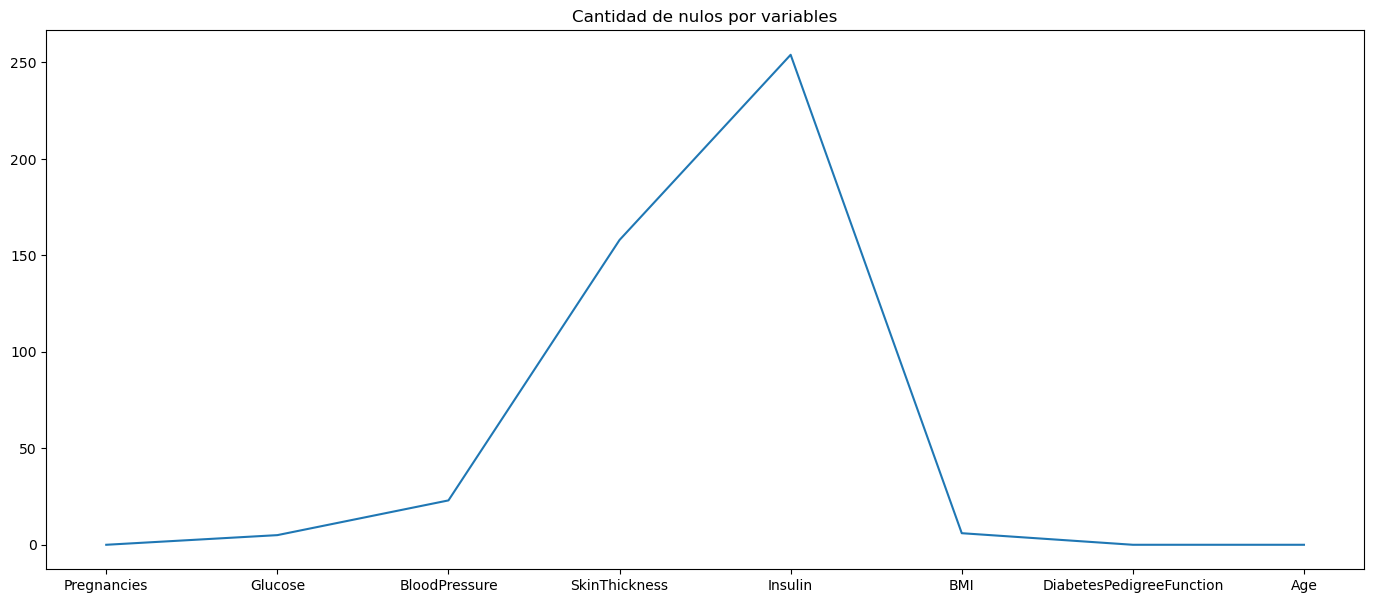

In [21]:
plt.figure(figsize=(17,7))
plt.title("Cantidad de nulos por variables")
plt.plot(X_train.isnull().sum())
plt.show()

In [22]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(X_train)
X1 = imp_mean.transform(X_train)
X1_test = imp_mean.transform(X_test)
X1_val = imp_mean.transform(X_val)

imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
imp_median.fit(X_train)
X2 = imp_median.transform(X_train)
X2_test = imp_median.transform(X_test)
X2_val = imp_median.transform(X_val)

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(X_train)
X3 = imp_mean.transform(X_train)
X3_test = imp_mean.transform(X_test)
X3_val = imp_mean.transform(X_val)

Responda las siguientes preguntas:

*   ¿Qué es la imputación de datos? 

$\textbf{R:}$ Es la sustitución de valores faltantes o no informado para alguna variable.

*   ¿Cuáles son las ventajas y desventajas de los 3 métodos recién utilizados versus sin imputar ($X_o$)?

$\textbf{R:}$ Una ventaja evidente es que contamos con más datos que si solo eliminamos al sujeto que tuvieran NaN en alguna de sus variables, es decir evitamos eliminar una fila de los datos o bien al contrario que eliminemos una variable por tener una alta cantidad de NaN como es el caso de Insulin. Las ventajas particulares para cada método son las siguientes:

La de reemplazar por 0 es que evitamos cometer alguna arbitrariedad y cargar el dato hacia una estructura más parecida a estadistica clásica, donde los estadisticos tradicionales como media y mediana tienen una alta representatividad de la distribución de los datos, pero estas estructuras podrían no estar en nuestras variables.

La de reemplzar por la media permite mantener estadisticos insesgados, pues el promedio es el representante que menos sesgo tiene a la hora de alterar los datos, es decir no estamos alterando el promedio "incompleto" de los datos con los que contamos, por lo que nuestra estimación de la media de los datos se mantiene.

La de reemplazar la mediana es que las proporciones de los datos se mantienen evitando que "carguemos" el dataset generando una tendencia por variable.

La del método iterativo es más "robusta" al buscar utilizar una regresión a partir de los otros datos para poder determinar las  variables, siendo más flexible para poder determinar los datos dependiendo de las distribuciones de las variables involucradas.

Una desventaja en común que tienen todos estos métodos es que dotan de una estructura que puede resultar no ser real a los datos, por ejemplo la de la media puede estar rellenandno con datos que no son representativos o bien nunca están presentes en una observación, la de la mediana podría estar desvalanceando el conjunto si la distribución del mismo fuera un poco compleja como por ejemplo que el 49% de los datos fuera 0 un 2% fuera 9 y el resto fuera 10, con lo que estariamos llenando mucha de la data con 9 algo que carga la data hacia un lado de manera más cargada. Lo mismo sucedew con el método iterativo, pues busca relaciones entre las variables, lo que me puede llevar a generar una estructura de dependencia que a priori podría no existir o aumentar de alta manera la autocorrelación de mis variables, lo que sabemos que a posteriori es algo que no deseamos, pues condiciona el desempeño del algoritmo a futuro. En conclusión todos tienen el mismo error pero para distitntos escenarios.

*   ¿Qué se necesita para ejecutar cada uno de los 3 métodos de imputación de datos?

Para los métodos de media y mediana se necesita que tengamos sus estimadores en el conjunto de entrenamiento, mientras que para el iterativo que exista una relación entre las variables. Para determinar cual se debería utilizar se debería estudiar la distribución de las variables y la correlación de las mismas.

*   ¿Qué puede decir de los conjuntos resultantes?¿Resuelven el problema de los datos faltantes?

Los conjuntos resultantes evitan tener que eliminar datos de distintas personas o bien eliminar variables, lo que es positivo y cada método da estructuras distintas, con lo que inducira estructuras distintas.



[1] https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.169.5745&rep=rep1&type=pdf

[2] https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html?highlight=mice


## 1.d Estandarización

`Nota:` A menos que se indique explícitamente lo contrario, en esta y las siguientes preguntas realice los siguientes procedimientos y entrene las redes considerando como conjunto de entrenamiento cada $X \in \{X_o, X_1, X_2, X_3\}$ obtenido en la imputación anterior y comente las diferencias que observa en los desempeños de sus redes.

Ajuste los scalers con los datos de entrenamiento y transforme los datos para cada conjunto obtenido en la pregunta anterior.

- ¿Qué operación matemática realiza `StandarScaler` al momento de tranformar los datos? 

$\textbf{R:}$ StandarScaler realiza una estandarización, es decir reta la media de los datos y divide todo por la desviación estandar. Es decir realiza la siguiente operatoria:

$$z_{i}=\frac{x_{i}-\overline{x}}{\sigma}$$

- ¿Por qué debemos transformar los datos de validación y de test con el _scaler_ ajustado a los datos de entrenamiento? 

Porque de el promedio y la desviación estandar de la validación y el test podrían ser distintos al del training set, con lo que podriamos estar tratando con datos falsamente distintos. Además que sólo debemos trabajar con el promedio y desviación estandar del training set.

In [23]:
from sklearn.preprocessing import StandardScaler

scaler_x0 = StandardScaler()
scaler_x0.fit(X0)
x_train_0 = scaler_x0.transform(X0)
x_val_0 = scaler_x0.transform(X0_val)
x_test_0 = scaler_x0.transform(X0_test)

scaler_x1 = StandardScaler()
scaler_x1.fit(X1)
x_train_1 = scaler_x1.transform(X1)
x_val_1 = scaler_x1.transform(X1_val)
x_test_1 = scaler_x1.transform(X1_test)

scaler_x2 = StandardScaler()
scaler_x2.fit(X2)
x_train_2 = scaler_x2.transform(X2)
x_val_2 = scaler_x2.transform(X2_val)
x_test_2 = scaler_x2.transform(X2_test)

scaler_x3 = StandardScaler()
scaler_x3.fit(X3)
x_train_3 = scaler_x3.transform(X3)
x_val_3 = scaler_x3.transform(X3_val)
x_test_3 = scaler_x3.transform(X3_test)


## 1.e Primera Red
En esta pregunta construiremos y entrenaremos una primera red neuronal. Para esto utilizaremos la librería keras que se ocupa de crear, compilar y entrenar los modelos de manera simple. Keras se encargará por lo tanto de crear los modelos y al momento de compilarlos se instanciarán estos en una sesión de TensorFlow. 

Esta primera red será una red de una capa oculta con $256$ neuronas, activación ReLu. Para esta red y todas las demas utilizaremos la función de pérdida _Binary Cross Entropy_ ¿Porqué se ocupa esta función de pérdida?¿Qué función de activación se utiliza para la capa de salida en este tipo de problemas?¿Cuántas neuronas para la capa de salida?. Para entrenar esta primera red utilizaremos Gradiente Descendente Estocástico con un _Learn Rate_ de 0.002. Finalmente entrenaremos esta red por unas 20 _epochs_.

$\textbf{R:}$ Se utiliza esta función de perdida por ser una función que tiene sentido para el problema, el cual  es de clasificación binaria. Podría utilizarse una función de activación sigmoidal o bien una tangente hiperbolica pues estamos en un escenario de clasificación binaria. Al ser un problema de clasificación binaria se utiliza una neurona en la capa de salida.

Construya la red basandose en el siguiente código y en la documentación de keras. 

In [25]:
def make_model(name, lr = 2e-3, actv_func = "relu", kernel_regularizer = None, n_units = 256):
    input_layer = tf.keras.layers.Input(shape = (8, ))
    layer_1 = tf.keras.layers.Dense(n_units, activation = actv_func, kernel_regularizer = kernel_regularizer)(input_layer)
    output_layer = tf.keras.layers.Dense(1, activation = "sigmoid")(layer_1)

    model = tf.keras.Model(inputs = input_layer, outputs = output_layer, name = name)

    model.compile(
        optimizer = SGD(learning_rate = lr),
        loss = tf.losses.BinaryCrossentropy(),
        metrics = [tf.metrics.BinaryAccuracy()]
    )
    
    return model

Utilice el método `.summary` para ver el número de parámetros de su red y los tamaños de cada capa. 

Explique el número de parámetros presentes en esta red, es decir: ¿Cómo a partir de la dimensión del _Input_ y el número de neuronas obtenemos ese número de parámetros?

$\textbf{R:}$ Para la primera capa obtenemos que tendremos 256 conexiones por cada input más un bias para cada neurona con lo que obtenemos las siguientes ecuaciones.

$\textit{Numero de parametros para la primera capa}=\textit{Numero de variables inputs} \cdot \textit{Numero de neuronas en la capa}+\textit{Numero de neuronas en la capa}= (\textit{Numero de variables inputs}+1) \cdot \textit{Numero de neuronas en la capa}=9 \cdot 256=2304$

$\textit{Numero de parametros para la capa de salida}=\textit{Numero de neuronas de la primera capa} +1=257$

$\textit{Total de parametros}=\textit{Numero de parametros para la primera capa}+\textit{Numero de parametros para la capa de salida}= 2561$

In [161]:
model_0 = make_model("For_0")
model_0.summary()

Model: "For_0"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_55 (InputLayer)       [(None, 8)]               0         
                                                                 
 dense_104 (Dense)           (None, 256)               2304      
                                                                 
 dense_105 (Dense)           (None, 1)                 257       
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


Entrene la red por 20 _epochs_, guardando el `history` que retorna el metodo `.fit`.

Grafique como varian los errores de validación y de entrenamiento a lo largo de las _epochs_. Comente.

In [26]:
def make_plot(history, to_viz, title):
    to_viz = "loss"
    plt.plot(history.history[to_viz])
    plt.plot(history.history['val_'+to_viz])
    plt.title(title)
    plt.ylabel(to_viz)
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

### Método Zero Imputation

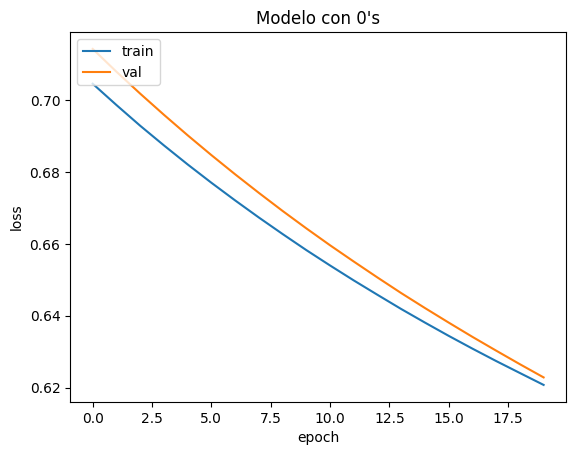

In [185]:
history_0 = model_0.fit(x_train_0, y_train, epochs = 20, validation_data=(x_val_0, y_val), verbose = 0)
make_plot(history_0, "loss", "Modelo con 0's")

### Método del promedio

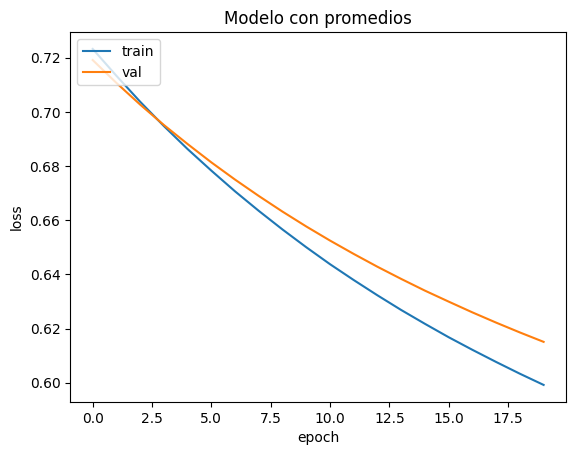

In [186]:
model_mean = make_model("For_mean")
history_mean = model_mean.fit(x_train_1, y_train, epochs = 20, validation_data=(x_val_0, y_val), verbose = 0)
make_plot(history_mean, "loss", "Modelo con promedios")

### Método de la mediana

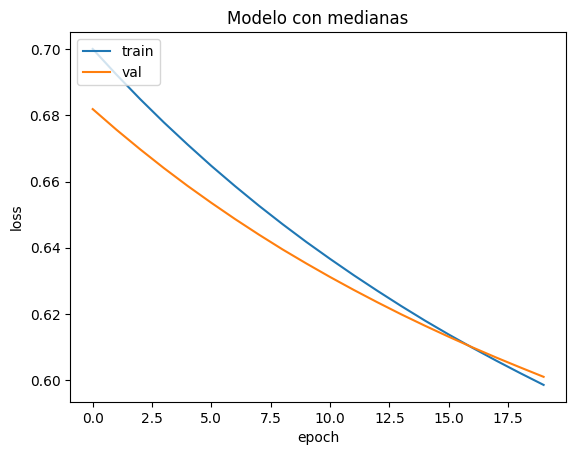

In [187]:
model_median = make_model("For_median")
history_median = model_median.fit(x_train_2, y_train, epochs = 20, validation_data=(x_val_0, y_val), verbose = 0)
make_plot(history_median, "loss", "Modelo con medianas")

### Método iterativo

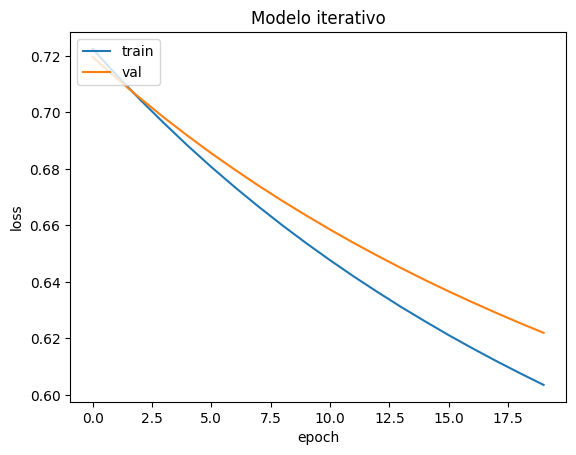

In [188]:
model_iterative = make_model("For_iteration")
history_iterative = model_iterative.fit(x_train_3, y_train, epochs = 20, validation_data=(x_val_0, y_val), verbose = 0)
make_plot(history_iterative, "loss", "Modelo iterativo")

Para los tres graficos anteriores se evidencia que los métodos de imputación generaron desempeños similares, aunque la imputacion pareciera estar dando muestras de overfitting y esto se podría deber a que se esta construyendo una estructura de dependencia entre los datos que esta herrada, por otro lado, el modelo de la mediana consigue el mejor desempeño desde el punto de vista del validation set. Pero para sacar resultados más concluyentes se deberían utilizar más epocas para poder evaluar las caracteristicas de la sensibilidad el overfitting.

Cree y entrene nuevamente la red, esta vez cambiando el _learn rate_ utilizado para el SGD. Pruebe a lo menos un valor mayor y un valor menor al elegido anteriormente. Note que para valores mayores al propuesto puede comenzar a observar fenómeno de divergencia, por lo cual es recomendable agregarle a la red un _callback_, es decir una función que verifica estados y comportamientos de la red mientras se entrena, en particular `TerminateOnNaN`, el cual interrumpirá el proceso de entrenamiento si encuentra un valor NaN. 

Grafique el comportamiento de los errores de validación y entrenamiento y comente.

### Método de Zero imputation

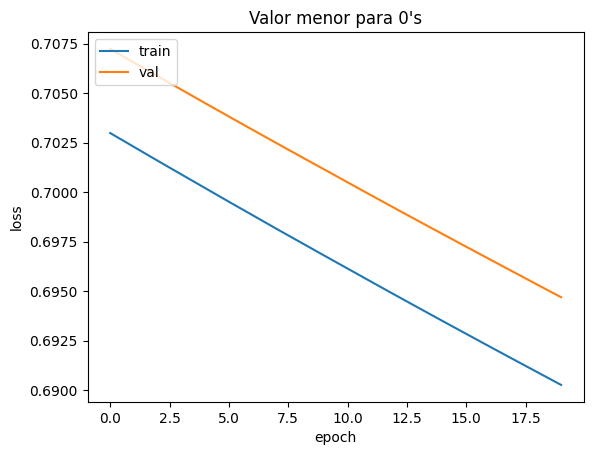

In [189]:
from keras.callbacks import TerminateOnNaN

model_0_lower = make_model("Less_for_0", 2e-4)
history_0_lower = model_0_lower.fit(x_train_0, y_train, epochs = 20, validation_data=(x_val_0, y_val), verbose = 0, callbacks = [TerminateOnNaN()])
make_plot(history_0_lower, "loss", "Valor menor para 0's")

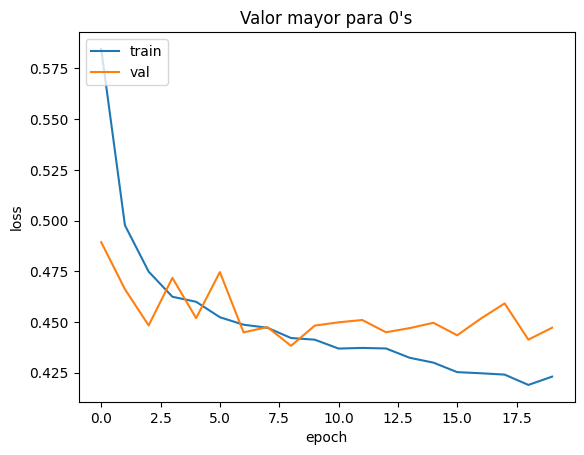

In [190]:
model_0_greather = make_model("Greather_for_0", 2e-1)
history_0_greather = model_0_greather.fit(x_train_0, y_train, epochs = 20, validation_data=(x_val_0, y_val), verbose = 0, callbacks = [TerminateOnNaN()])
make_plot(history_0_greather, "loss", "Valor mayor para 0's")

Un mayor learning rate nos una inestabilidad propia de utilizar learning rate mayor, pero que a la vez, tienen una convergencia más rápida para el training set, con lo que se pueden conseguir mejores desempeños en el validation set en una cantidad pequeña de epocas, pero la inestabilidad del gran learning rate puede conllevar una convergencia más que requiera mayor cantidad de pasos o bien, no poder encontrar los optimos para el problema, con lo que podriamos estar saltando entre muchos puntos, como se observa en el grafico anterior, desde la octava epoca no hubo mejor en el validation set.

### Método del promedio

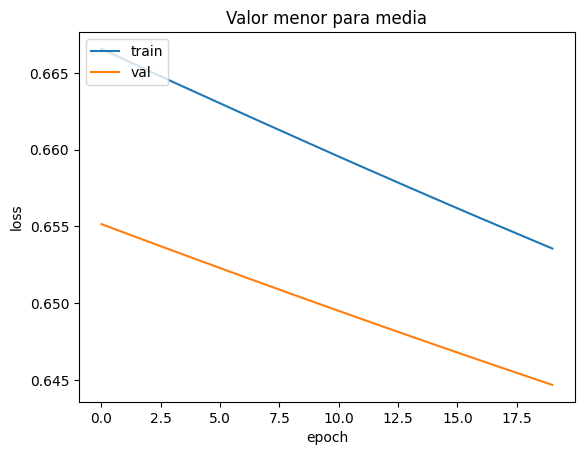

In [191]:
model_mean_lower = make_model("Less_for_mean", 2e-4)
history_mean_lower = model_mean_lower.fit(x_train_1, y_train, epochs = 20, validation_data=(x_val_0, y_val), verbose = 0, callbacks = [TerminateOnNaN()])
make_plot(history_mean_lower, "loss", "Valor menor para media")

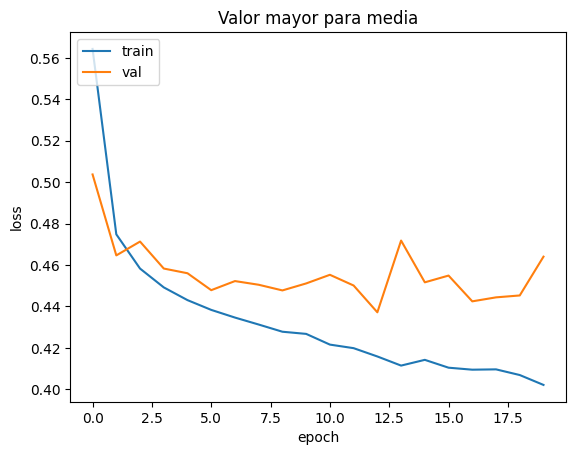

In [192]:
model_mean_greather = make_model("Greather_for_mean", 2e-1)
history_mean_greather = model_mean_greather.fit(x_train_1, y_train, epochs = 20, validation_data=(x_val_0, y_val), verbose = 0, callbacks = [TerminateOnNaN()])
make_plot(history_mean_greather, "loss", "Valor mayor para media")

Un mayor learning rate nos una inestabilidad propia de utilizar learning rate mayor, pero que a la vez, tienen una convergencia más rápida para el training set, con lo que se pueden conseguir mejores desempeños en el validation set en una cantidad pequeña de epocas, pero la inestabilidad del gran learning rate puede conllevar una convergencia más que requiera mayor cantidad de pasos o bien, no poder encontrar los optimos para el problema, a diferencia del cero imputation el metodo de la media pareciera reducir la inestabilidad del mayor learning rate. Para el learning rate pequeño se consiguen mejores desempeños para las mismas epocas, mientras que para el gran learning rate, se consiguen desempeños similares.

### Método de la mediana

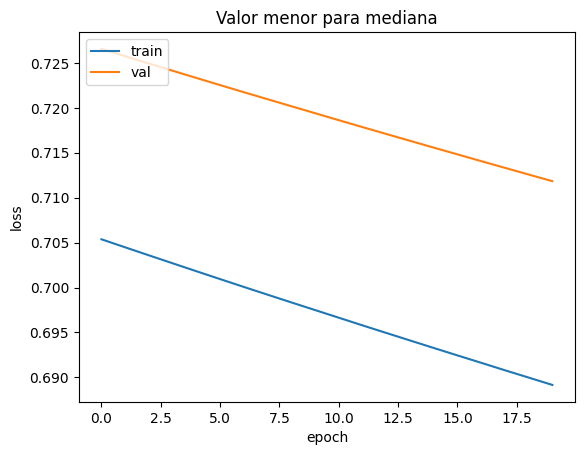

In [193]:
model_median_lower = make_model("Less_for_median", 2e-4)
history_median_lower = model_median_lower.fit(x_train_2, y_train, epochs = 20, validation_data=(x_val_0, y_val), verbose = 0, callbacks = [TerminateOnNaN()])
make_plot(history_median_lower, "loss", "Valor menor para mediana")

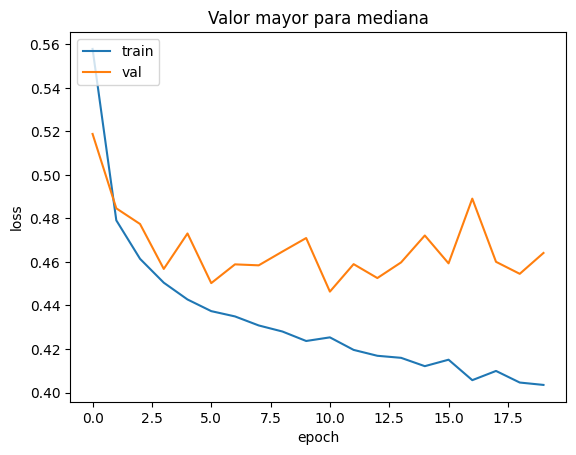

In [194]:
model_median_greather = make_model("Greather_for_median", 2e-1)
history_median_greather = model_median_greather.fit(x_train_2, y_train, epochs = 20, validation_data=(x_val_0, y_val), verbose = 0, callbacks = [TerminateOnNaN()])
make_plot(history_median_greather, "loss", "Valor mayor para mediana")

Un mayor learning rate nos una inestabilidad propia de utilizar learning rate mayor, pero que a la vez, tienen una convergencia más rápida para el training set, con lo que se pueden conseguir mejores desempeños en el validation set en una cantidad pequeña de epocas, pero la inestabilidad del gran learning rate puede conllevar una convergencia más que requiera mayor cantidad de pasos o bien, no poder encontrar los optimos para el problema. Este entrenamiento es bastante similar en cuanto a comportamiento cualitativo que el zero imputation, pero tiene unas pequeñas mejoras en los validation set.

### Método iterativo

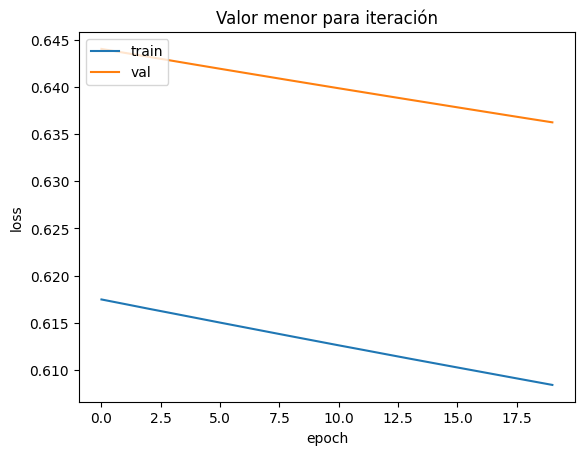

In [195]:
model_iterative_lower = make_model("Less_for_iterative", 2e-4)
history_iterative_lower = model_iterative_lower.fit(x_train_3, y_train, epochs = 20, validation_data=(x_val_0, y_val), verbose = 0, callbacks = [TerminateOnNaN()])
make_plot(history_iterative_lower, "loss", "Valor menor para iteración")

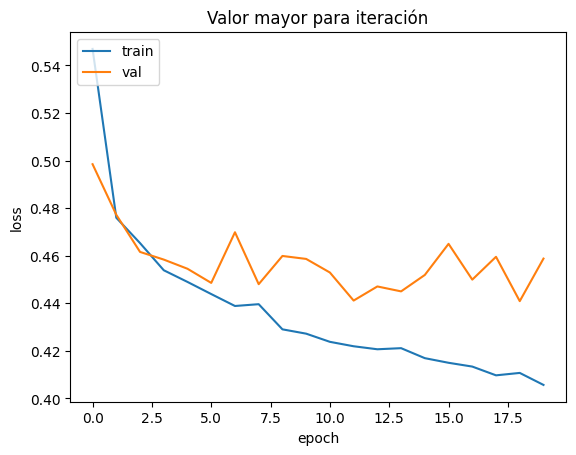

In [196]:
model_iterative_greather = make_model("Greather_for_median", 2e-1)
history_iterative_greather = model_iterative_greather.fit(x_train_3, y_train, epochs = 20, validation_data=(x_val_0, y_val), verbose = 0, callbacks = [TerminateOnNaN()])
make_plot(history_iterative_greather, "loss", "Valor mayor para iteración")

Un mayor learning rate nos una inestabilidad propia de utilizar learning rate mayor, pero que a la vez, tienen una convergencia más rápida para el training set, con lo que se pueden conseguir mejores desempeños en el validation set en una cantidad pequeña de epocas, pero la inestabilidad del gran learning rate puede conllevar una convergencia más que requiera mayor cantidad de pasos o bien, no poder encontrar los optimos para el problema. Este entrenamiento es bastante similar en cuanto a comportamiento cualitativo que el zero imputation, pero tiene unas pequeñas mejoras en los validation set.

## 1.f Activación y regularizadores $l1$ $l2$
En esta pregunta se les propone explorar distintas funciones de activación y de regularización. En ambos casos debe entrenar la misma red entrenada anteriormente utilizando gradiente descendente estocástico con algun _learn rate_ que le parezca adecuado luego de la exploración en la pregunta anterior. 

* Para explorar distintas funciones de activación, cambie la activación de la capa oculta sucesivamente por: tangente hiperbólica, _Leaky ReLu_, sigmoidea y lineal. Para esto puede basarse en el código presentado abajo y la documentación de keras. Para la activación _Leaky ReLu_ pruebe cambiar el parámetro de la red. Describa sus resultados y si observa diferencias entre las redes. 


In [175]:
# activations
names = ["Zero Imputation", "Mean imputation", "Median imputation", "Iterative imputation"]
activation_fuctions = ['relu','sigmoid', 'tanh', 'linear', tf.keras.layers.LeakyReLU()]
vals = []

data_train = [x_train_0, x_train_1, x_train_2, x_train_3]
data_val = [x_val_0, x_val_1, x_val_2, x_val_3]

i = 0
for train, val in zip(data_train, data_val):
    for activation in activation_fuctions:
        
        model = make_model("Testing", 2e-3, actv_func = activation)
        history = model.fit(train, y_train, validation_data = (val, y_val), epochs = 100, verbose = 0)
        
        val_acc = max(history.history['val_binary_accuracy'])
        train_acc = history.history['binary_accuracy'][np.argmax(history.history['binary_accuracy'])]
        
        if type(activation) is not str:
            activation = "LeakyReLU"
        vals.append((val_acc, activation, i))
        print(f'{names[i]} with {activation} activation, binary_accuracy: {train_acc}, val_binary_accuracy: {val_acc}')
    i += 1
    print()

Zero Imputation with relu activation, binary_accuracy: 0.7728118896484375, val_binary_accuracy: 0.798701286315918
Zero Imputation with sigmoid activation, binary_accuracy: 0.6741154789924622, val_binary_accuracy: 0.6363636255264282
Zero Imputation with tanh activation, binary_accuracy: 0.769087553024292, val_binary_accuracy: 0.8246753215789795
Zero Imputation with linear activation, binary_accuracy: 0.7709497213363647, val_binary_accuracy: 0.798701286315918
Zero Imputation with LeakyReLU activation, binary_accuracy: 0.7616387605667114, val_binary_accuracy: 0.8051947951316833

Mean imputation with relu activation, binary_accuracy: 0.7672253251075745, val_binary_accuracy: 0.7467532753944397
Mean imputation with sigmoid activation, binary_accuracy: 0.6797020435333252, val_binary_accuracy: 0.6298701167106628
Mean imputation with tanh activation, binary_accuracy: 0.769087553024292, val_binary_accuracy: 0.798701286315918
Mean imputation with linear activation, binary_accuracy: 0.761638760566

Un poco más arriba podemos apreciar el desempeño de todas las imputaciones para distintas funciones de activación, a modo general podemos ver que la imputación por 0 pareciera ser la que mejor desemepeños tiene y eso puede ser debido a que la red esta comprendiendo que es un dato poco confiable lo que es un 0. Respecto a la diferencia entre redes con distintas funciones de activación, la activación sigmoidal resultó ser la de peor desempeño para todos los casos. Mientras que no existe una "mejor" en todas las redes. Pero hay claras evidencia de diferencias para distintas combinaciones de funciones de activación y metodos de imputación.

In [177]:
vals.sort()
vals[-5 : ]

[(0.798701286315918, 'relu', 0),
 (0.798701286315918, 'tanh', 1),
 (0.8051947951316833, 'LeakyReLU', 0),
 (0.8116883039474487, 'linear', 2),
 (0.8246753215789795, 'tanh', 0)]

* Seleccione la función de activación que mejor resultados le dió y agregue regularización $l1$ a la capa oculta, luego pruebe con $l2$. Pruebe cambiar la tasa de regularización, reportando sus resultados. ¿Qué ocurre si la regularización es muy alta o muy baja? Una vez satisfecho con una tasa de regularización, aplique la regularización a la capa de salida y luego a ambas capas.  
Si la regularización es muy es muy alta dejamos un mayor espacio de busqueda para la optimización en caso de ser la regularización muy pequeña reducimos el espacio de busqueda de las variables de interes, con lo cual controlamos que las variables que queremos optimizar no se alejen demasiado.

In [29]:
best_activation = "tanh"

In [182]:
# regularizer
from keras.regularizers import l1, l2

regularizer_fuctions = [l1, l2]
regularizer_values = [0.0001, 0.001, 0.01, 0.1]
vals_reg = []

i = 0
for train, val in zip(data_train, data_val):
    
    j = 1
    for regularizer in regularizer_fuctions:
        for value in regularizer_values:
            
            model = make_model("Testing", 2e-3, actv_func = best_activation, kernel_regularizer = regularizer(value))
            history = model.fit(train, y_train, validation_data = (val, y_val), epochs = 100, verbose = 0)
            
            val_acc = max(history.history['val_binary_accuracy'])
            train_acc = history.history['binary_accuracy'][np.argmax(history.history['binary_accuracy'])]
            
            vals_reg.append((val_acc, ["l1", "l2"][regularizer_fuctions.index(regularizer)], i))
            
            print(f'{names[i]} with l{j}({value}) regularizer, binary_accuracy: {train_acc}, val_binary_accuracy: {val_acc}')
        print()
        j += 1
    print("--------------------------------------------")
    i += 1

Zero Imputation with l1(0.0001) regularizer, binary_accuracy: 0.7728118896484375, val_binary_accuracy: 0.8051947951316833
Zero Imputation with l1(0.001) regularizer, binary_accuracy: 0.7728118896484375, val_binary_accuracy: 0.8116883039474487
Zero Imputation with l1(0.01) regularizer, binary_accuracy: 0.7709497213363647, val_binary_accuracy: 0.8311688303947449
Zero Imputation with l1(0.1) regularizer, binary_accuracy: 0.7523277401924133, val_binary_accuracy: 0.8051947951316833

Zero Imputation with l2(0.0001) regularizer, binary_accuracy: 0.7783985137939453, val_binary_accuracy: 0.8181818127632141
Zero Imputation with l2(0.001) regularizer, binary_accuracy: 0.7709497213363647, val_binary_accuracy: 0.8181818127632141
Zero Imputation with l2(0.01) regularizer, binary_accuracy: 0.7709497213363647, val_binary_accuracy: 0.8116883039474487
Zero Imputation with l2(0.1) regularizer, binary_accuracy: 0.7672253251075745, val_binary_accuracy: 0.7922077775001526

----------------------------------

In [183]:
vals_reg.sort()
vals_reg[-5 :]

[(0.8116883039474487, 'l1', 1),
 (0.8116883039474487, 'l2', 0),
 (0.8181818127632141, 'l2', 0),
 (0.8181818127632141, 'l2', 0),
 (0.8311688303947449, 'l1', 0)]

In [28]:
best_kernel = "l1"

¿Para qué se usan activaciones no lineales? ¿Le parece buena opción la activación sigmoidea para la capa oculta?

Para buscar estructuras complejas que podrían ser del tipo "clasificatorio" de manea que los atributos que construye la neurona tengan una estructura no lineal. No es buena idea utilizar sigmoide si se puede utilizar tangente hiperbolica, pues su desempeño en el peor de los casos es igual, esto por el recorrido de las funciones.

¿Cual es la intención de la regularización en general? En particular, ¿Que restricción implicita imponen las regularizaciones $l1$ o $l2$ sobre los pesos de la capa en la cual se aplican? Apoyese de ecuaciones.

La intención de la regularización es reducir el espacio de busqueda para realizar una optimización más rápida y que sea menos sensible al overfitting generando que los valores de los pesos no se escapen, algunas de las condiciones que esto requieren es trabajar con data estandarizada en particular para regularización $l2$. La restricción implicita es que la regularización $l1$ suele llevar a soluciones donde los vectores tienen algunas de sus componentes en 0 o cercanas a 0, mientras que la regularización $l2$ puede encontrarse en combinaciones que no sean con una variable igual a 0. Esto se debe a las ecuaciones de regularización $l1$ es:

$$\Omega(W)=||W||_{L1}=\sum_{j}|w_{j}|$$
$$\Omega(W)=\frac{1}{2}||W||_{L2}^{2}=\frac{1}{2}\sum_{j}|w_{j}|^{2}$$

El primer conjunto es un romboide mientras el otro es una esfera.

## 1.g Exploración del Número de neuronas

Ahora probaremos cambiando el número de neuronas en la capa oculta. Para esto, entrene la red con los hiperparámetros que estimen conveniente luego de la pregunta anterior, variando el numero de neuronas. Deben explorar a lo menos 10 número de neuronas distintos. Una recomendación sería por ejemplo explorar numero de neuronas en potencias de 2. 

In [242]:
train_error, val_error = [], []

i = 0
for train, val in zip(data_train, data_val):
    for n_units in [2**(k) for k in range(1, 11)]:
        
        model = make_model("Testing", 2e-3, actv_func = best_activation, kernel_regularizer = best_kernel, n_units = n_units)
        history = model.fit(train, y_train, validation_data = (val, y_val), epochs = 1000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])
        
        arg_min_val = np.argmin(history.history['val_loss'])
        val_error.append((min(history.history['val_loss']), n_units, arg_min_val))

        train_error.append((history.history['loss'][arg_min_val], n_units, arg_min_val))
        
        acc = history.history['binary_accuracy'][arg_min_val]
        val_acc = history.history['val_binary_accuracy'][arg_min_val]
        
        print(f'{names[i]}, n: {n_units} , loss: {train_error[-1][0]:.4f}, val_loss: {val_error[-1][0]:.4f}, acc: {acc:.4f}, val_acc: {val_acc:.4f}')
    print("--------------------------\n")
    i+=1

Zero Imputation, n: 2 , loss: 0.4988, val_loss: 0.5117, acc: 0.7728, val_acc: 0.7987
Zero Imputation, n: 4 , loss: 0.4977, val_loss: 0.5140, acc: 0.7765, val_acc: 0.7987
Zero Imputation, n: 8 , loss: 0.5119, val_loss: 0.5250, acc: 0.7765, val_acc: 0.7922
Zero Imputation, n: 16 , loss: 0.5240, val_loss: 0.5380, acc: 0.7747, val_acc: 0.7792
Zero Imputation, n: 32 , loss: 0.5120, val_loss: 0.5268, acc: 0.7728, val_acc: 0.7857
Zero Imputation, n: 64 , loss: 0.5151, val_loss: 0.5259, acc: 0.7747, val_acc: 0.7792
Zero Imputation, n: 128 , loss: 0.5171, val_loss: 0.5296, acc: 0.7709, val_acc: 0.7792
Zero Imputation, n: 256 , loss: 0.5197, val_loss: 0.5326, acc: 0.7709, val_acc: 0.7857
Zero Imputation, n: 512 , loss: 0.5189, val_loss: 0.5322, acc: 0.7691, val_acc: 0.7857
Zero Imputation, n: 1024 , loss: 0.5207, val_loss: 0.5327, acc: 0.7691, val_acc: 0.7857
--------------------------

Mean imputation, n: 2 , loss: 0.4760, val_loss: 0.4954, acc: 0.7803, val_acc: 0.7922
Mean imputation, n: 4 , l

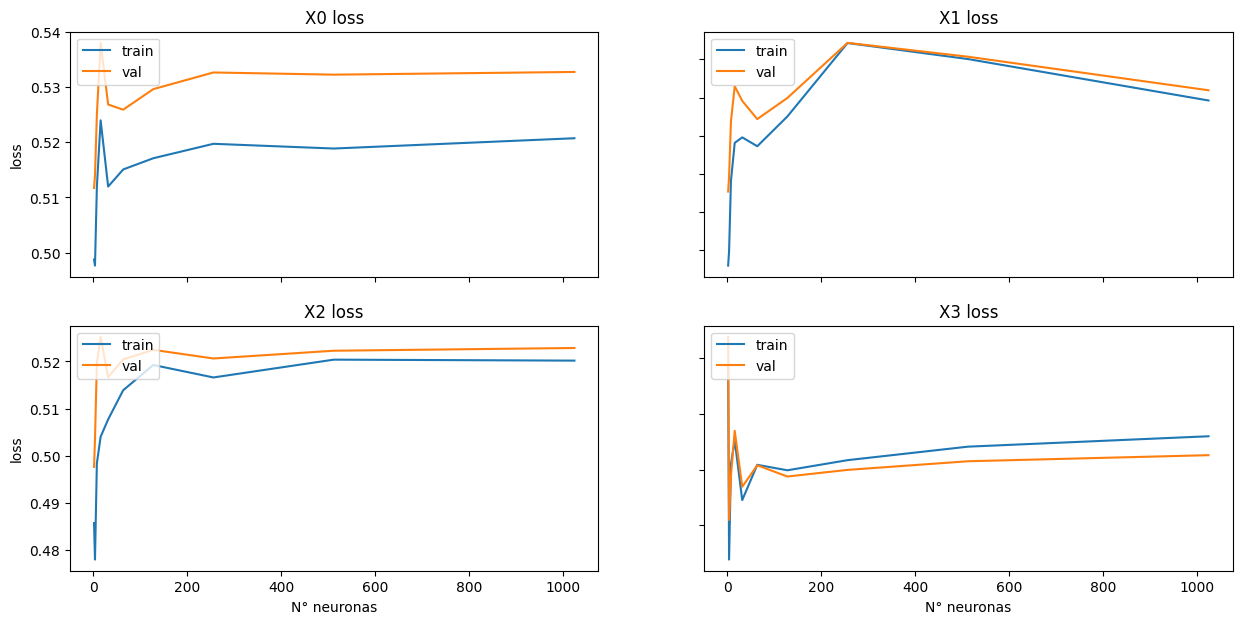

In [244]:
fig, axs = plt.subplots(2, 2)
fig.figure.set_size_inches(15,7)

v_y = list(map(lambda x : x[0], val_error))
v_x = list(map(lambda x : x[1], val_error))

t_y = list(map(lambda x : x[0], train_error))
t_x = list(map(lambda x : x[1], train_error))

axs[0, 0].plot(v_x[ : 10], v_y[ : 10])
axs[0, 0].plot(t_x[ : 10], t_y[ : 10])
axs[0, 0].set_title('X0 loss')
axs[0, 0].set_ylabel('loss')
axs[0, 0].set_xlabel('N° neuronas')
axs[0, 0].legend(['train', 'val'], loc='upper left')

axs[0, 1].plot(v_x[10 : 20], v_y[10 : 20])
axs[0, 1].plot(t_x[10 : 20], t_y[10 : 20])
axs[0, 1].set_title('X1 loss')
axs[0, 1].set_ylabel('loss')
axs[0, 1].set_xlabel('N° neuronas')
axs[0, 1].legend(['train', 'val'], loc='upper left')

axs[1, 0].plot(v_x[20 : 30], v_y[20 : 30])
axs[1, 0].plot(t_x[20 : 30], t_y[20 : 30])
axs[1, 0].set_title('X2 loss')
axs[1, 0].set_ylabel('loss')
axs[1, 0].set_xlabel('N° neuronas')
axs[1, 0].legend(['train', 'val'], loc='upper left')

axs[1, 1].plot(v_x[30 : ], v_y[30 : ])
axs[1, 1].plot(t_x[30 : ], t_y[30 : ])
axs[1, 1].set_title('X3 loss')
axs[1, 1].set_ylabel('loss')
axs[1, 1].set_xlabel('N° neuronas')
axs[1, 1].legend(['train', 'val'], loc='upper left')

for ax in axs.flat:
    ax.label_outer()

plt.show()

Para cada red entrenada, recuperen el mejor error de validación y el error de entrenamiento en la _epoch_ donde se obtuvo tal error de validación. Grafique como se comportan ambos errores a medida crece el número de neuronas y comente. 

Al tener una mayor cantidad de neuronas, se tiende a dar el overfitting, lo que es lógico, puesto que los datos con los que se trabajan son del orde de 800 mientras que los hiperparametros para una red con 256 neuronas con esta arquitectura es cercana 2566. Con lo que las redes que superen estás neuronas tienen que ajustar una gran cantidad de parametros con comparativamente pocos datos, ante lo cual el overfittin es algo que tiene sentido que sucediera, en cambio los mejores validation loss fueron para redes 16 neuronas, lo cual se puede deber a esta estructura tiene una cantidad de parametros a entrenar del orden de 150, aunque se evidencia que el overfitting tiene una cota, esto se debe a que de seguro la red esta desactivando neuronas al pasar el tiempo, es decir puede que de las 1024 neuronas presentes estén siendo significativamente distintas de cero unas 200 neuronas. Lo que si resulta curioso es el caso del X1 y esto se puede deber a la naturaleza insesgada de la imputación.

In [249]:
aux = list(val_error)
aux.sort()
aux[ : 10]

[(0.4760322570800781, 2, 999),
 (0.47802576422691345, 4, 999),
 (0.4797614812850952, 4, 999),
 (0.48577049374580383, 2, 999),
 (0.4876081645488739, 4, 999),
 (0.4976692795753479, 4, 999),
 (0.4982165992259979, 8, 999),
 (0.4984174072742462, 8, 999),
 (0.49875926971435547, 2, 999),
 (0.5040379166603088, 16, 999)]

In [248]:
aux[-5 : ]

[(0.5300758481025696, 512, 840),
 (0.5304366946220398, 16, 999),
 (0.5319539308547974, 1024, 999),
 (0.5342628359794617, 256, 807),
 (0.5568358898162842, 2, 123)]

## 1.h Dropout
Como seguramente constataron en la pregunta anterior, un numero demasiado grande de parámetros en el modelo puede llevarnos a observar el fenomeno de _overfitting_. Una aproximación a este fenómeno que ha dado excelente resultado en redes neuronales es el método _dropout_, donde estocásticamente se desactivan una fracción de las neuronas al momento del entrenamiento, así efectivamente reduciendo el tamaño del modelo que se entrena en cada iteración e implicitamente obteniendo modelos más robustos por el simple hecho que al momento de entrenar nunca se entrena el "mismo" modelo. 

Según lo aprendido en el ramo, ¿en qué consiste el fenómeno de _overfitting_? ¿Por qué modelos más grandes suelen presentar el fenómeno? 

El _overfitting_ es el fenomeno donde se esta disminuyendo el error de entrenamiento y a la vez se esta perdiendo capacidad de generalización. En otras palabras es el ajuste en el entrenamiento esta comprometiendo nuestra capacidad de generalización en un conjunto que no sea el conjunto de entrenamiento.
Los modelos con más parametros suelen presentar más overfitting porque al tener más parametros que ajustar el modelo es más capaz de capturar la relación entre las variables predictivas y el target, de manera que al tener más parametros por ajustar estos pueden ajustar mejor una curva que pase por el target en el conjunto de entrenamiento, esto se puede ver estadisticamente cómo tener grados de libertad cercanos a 0 o bien tener grados de libertad negativos en una distribución, es decir tengo más variables regresoras que puntos que ajustar, por lo cual puedo hacer ajuste "perfecto" pero sólo en el training set, algo que no va en el espiritu del Machine Learning.

Entrene la mejor red obtenida en la pregunta anterior agregando una capa de _Dropout_ con parámetro $0.5$ inmediatamente luego de la capa oculta. Repita luego el proceso con una red con el doble de neuronas. Note que el agregar una capa _dropout_ hará que la red entrene más lento, por lo cual es recomendable aumentar el numero de _epochs_ para entrenar la red a completitud. 

In [28]:
def make_model_drop(name, lr = 2e-3, actv_func = "relu", kernel_regularizer = None, n_units = 256, drop_rate = 0.5):
    input_layer = tf.keras.layers.Input(shape = (8, ))
    layer_1 = tf.keras.layers.Dense(n_units, activation = actv_func, kernel_regularizer = kernel_regularizer)(input_layer)
    drop = tf.keras.layers.Dropout(drop_rate)(layer_1)
    output_layer = tf.keras.layers.Dense(1, activation = "sigmoid")(drop)

    model = tf.keras.Model(inputs = input_layer, outputs = output_layer, name = name)

    model.compile(
        optimizer = SGD(learning_rate = lr),
        loss = tf.losses.BinaryCrossentropy(),
        metrics = [tf.metrics.BinaryAccuracy()]
    )
    
    return model

In [257]:
train_error, val_error = [], []
neuronas = [16, 2]

i = 0
with tf.device("/GPU:0"):
    for train, val in zip(data_train, data_val):
        for n_units in neuronas:

            model = make_model_drop("Testing", 2e-3, actv_func = best_activation, kernel_regularizer = best_kernel, n_units = n_units, drop_rate = 0.5)
            history = model.fit(train, y_train, validation_data = (val, y_val), epochs = 1000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])
            
            arg_min_val = np.argmin(history.history['val_loss'])
            val_error.append(min(history.history['val_loss']))

            train_error.append(history.history['loss'][arg_min_val])
            
            acc = history.history['binary_accuracy'][np.argmin(history.history['val_loss'])]
            val_acc = history.history['val_binary_accuracy'][np.argmin(history.history['val_loss'])]

            print(f'{names[i]}, n: {n_units} , loss: {val_error[-1]:.4f}, val_loss: {train_error[-1]:.4f}, acc: {acc:.4f}, val_acc: {val_acc:.4f}')
        print("--------------------------\n")
        i+=1

Zero Imputation, n: 16 , loss: 0.5296, val_loss: 0.5627, acc: 0.7579, val_acc: 0.7792
Zero Imputation, n: 2 , loss: 0.5171, val_loss: 0.5612, acc: 0.7374, val_acc: 0.7597
--------------------------

Mean imputation, n: 16 , loss: 0.5231, val_loss: 0.5373, acc: 0.7672, val_acc: 0.7792
Mean imputation, n: 2 , loss: 0.5413, val_loss: 0.5477, acc: 0.7281, val_acc: 0.7468
--------------------------

Median imputation, n: 16 , loss: 0.5213, val_loss: 0.5443, acc: 0.7672, val_acc: 0.7792
Median imputation, n: 2 , loss: 0.5291, val_loss: 0.5490, acc: 0.7412, val_acc: 0.7662
--------------------------

Iterative imputation, n: 16 , loss: 0.5282, val_loss: 0.5381, acc: 0.7579, val_acc: 0.7727
Iterative imputation, n: 2 , loss: 0.5575, val_loss: 0.5605, acc: 0.7393, val_acc: 0.7597
--------------------------



¿Qué observa al agregar _dropout_? Comente y compare con sus resultados anteriores. Se ve una mejora para evitar el overfitting, el apagado de neuronas controla no tener un exceso de parametros a ajustar, lo que conlleva evitar overfittin.

## 1.i Learning Rate Decay
Ahora entrenaremos un modelo manejando manualmente el _learn rate_. Para esto utilizaremos el _callback_ `LearningRateScheduler`. Este _callback_ nos permitirá implementar una función que maneje el _learn rate_ de nuestro modelo. 

Escriba una función que reciba la epoca actual y retorne un _learn rate_ lr. El lr inicial debe ser igual o mayor a alguno que haya dado buenos resultados en las preguntas anteriores. La función debe dividir por 2 el lr cada 10 _epochs_. Además ponga como restricción que el lr no debe ser menor a $5\times 10^{-5}$, es decir si el valor obtenido es menor a  $5\times 10^{-5}$, la función retorna  $5\times 10^{-5}$.

Entrene su red preferida de las preguntas anteriores con esta modificación, grafique los errores a lo largo del entrenamiento y comente. Según lo visto en el ramo, ¿por qué podría ser util disminuir el _learn rate_ a medida se avanza en el aprendizaje de la red? 

$\textit{R:}$ Porque si los pesos se inicializaron pequeños el primer gradiente producto por el learning rate va a ser alto en comparación respecto al futuro, donde el gradiente tiende a reducirse pues estamos convergiendo (Esto hablando en terminos de normas de gradiente) así conseguimos que cuando estemos acercandonos podramos converger de manera más suave y evitamos oscilaciones o bbien podemos evitar realizar overfitting al converger más lento.

In [47]:
train_error, val_error = [], []
histories = []

def step_decay(epoch, initial_lrate = 2e-3, drop = 0.5, epochs_drop = 10):
    return max((5e-5, initial_lrate / 2 ** (epoch // epochs_drop)))

schedule = LearningRateScheduler(step_decay, verbose=0)

i = 0
with tf.device("/GPU:0"):
    for train, val in zip(data_train, data_val):

        model = make_model_drop("Testing", 2e-3, actv_func = best_activation, kernel_regularizer = best_kernel, n_units = 16, drop_rate = 0.5)
        history = model.fit(train, y_train, validation_data = (val, y_val), epochs = 1000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6), schedule])
        
        histories.append(history)
        
        arg_min_val = np.argmin(history.history['val_loss'])
        val_error.append(min(history.history['val_loss']))

        train_error.append(history.history['loss'][arg_min_val])
        
        acc = history.history['binary_accuracy'][np.argmin(history.history['val_loss'])]
        val_acc = history.history['val_binary_accuracy'][np.argmin(history.history['val_loss'])]

        print(f'{names[i]}, loss: {val_error[-1]:.4f}, val_loss: {train_error[-1]:.4f}, acc: {acc:.4f}, val_acc: {val_acc:.4f}')
        i+=1

Zero Imputation, loss: 0.8983, val_loss: 0.9362, acc: 0.6592, val_acc: 0.7078
Mean imputation, loss: 0.8397, val_loss: 0.9194, acc: 0.6704, val_acc: 0.7468
Median imputation, loss: 0.8411, val_loss: 0.8971, acc: 0.7114, val_acc: 0.7532
Iterative imputation, loss: 0.8524, val_loss: 0.9286, acc: 0.6518, val_acc: 0.7792


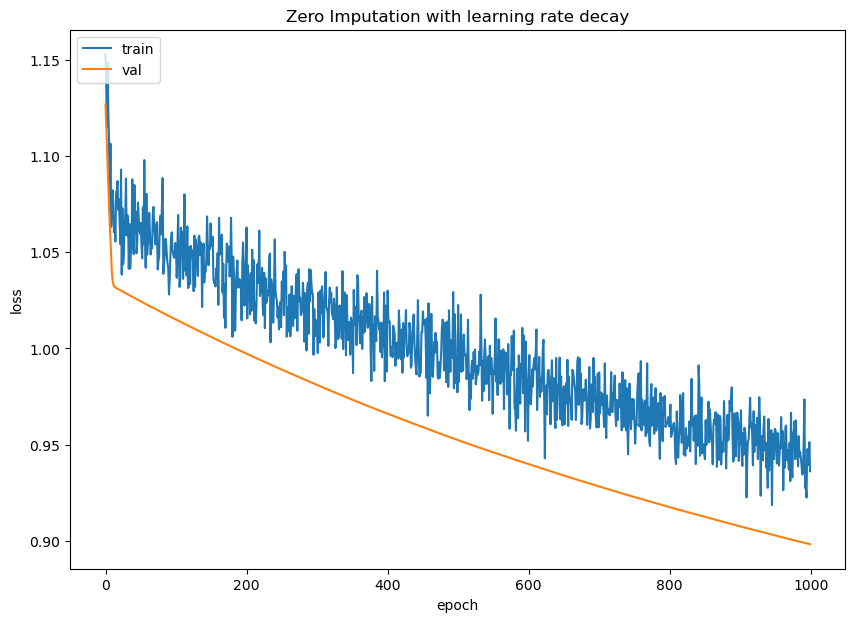

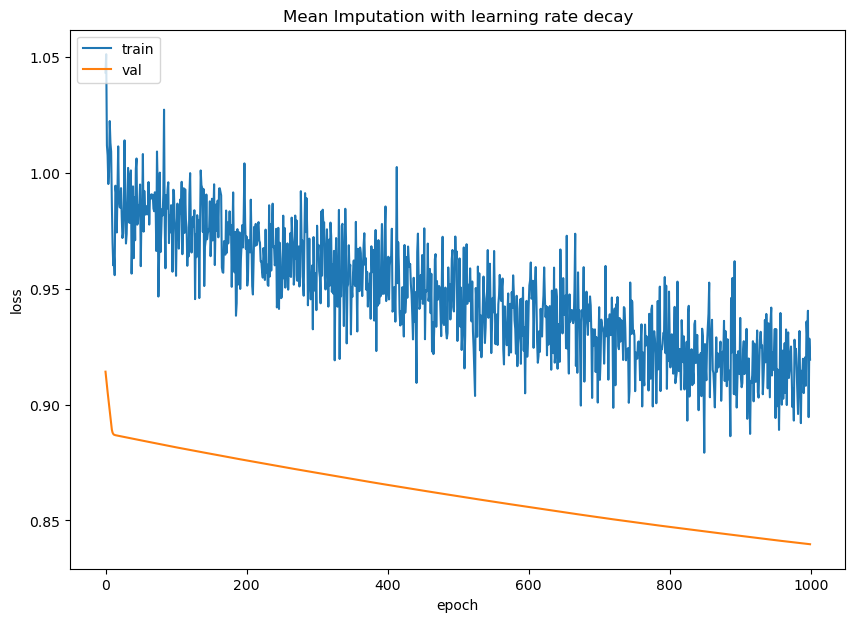

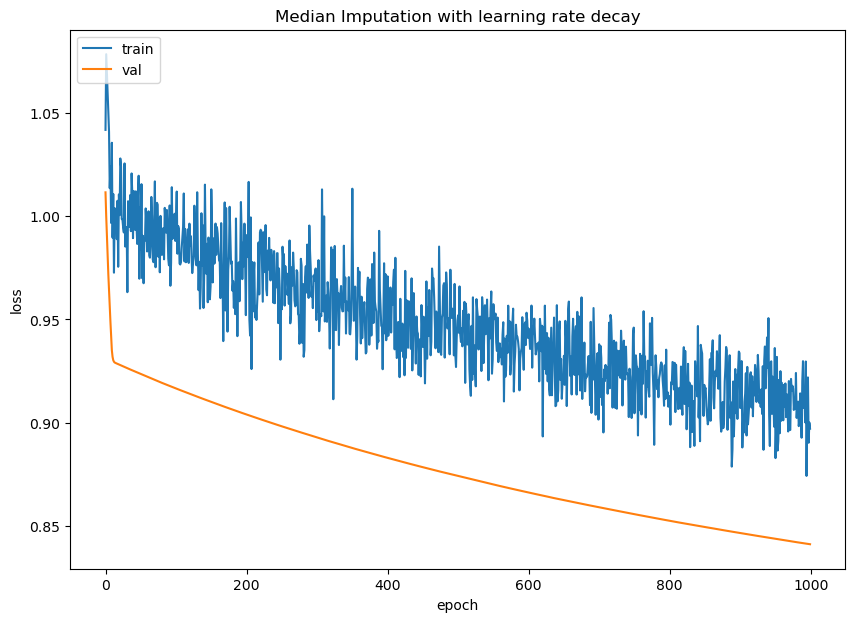

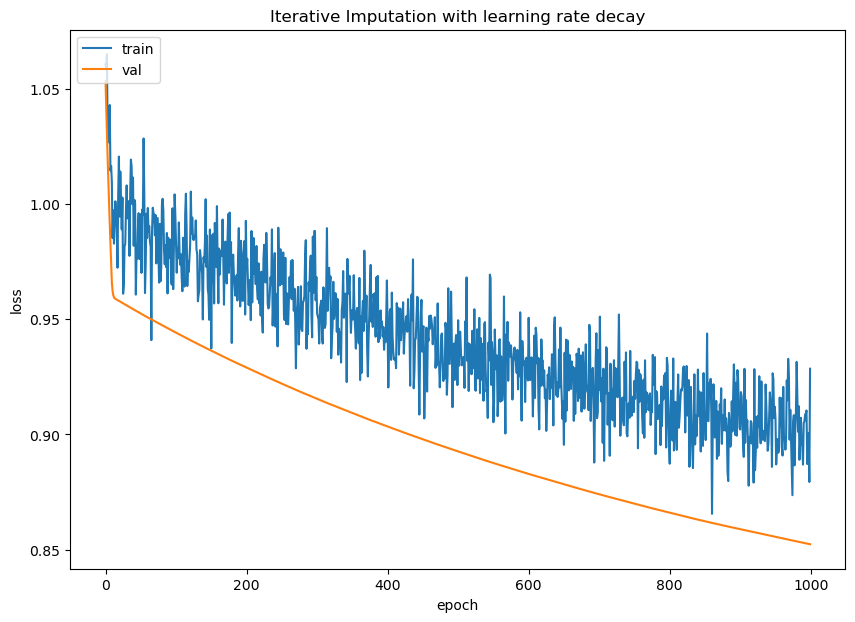

In [55]:
names = ["Zero Imputation with learning rate decay", "Mean Imputation with learning rate decay", "Median Imputation with learning rate decay", "Iterative Imputation with learning rate decay"]

for pos, name in enumerate(names):
    plt.figure(figsize = (10,7))
    make_plot(histories[pos], "loss", name)

## 1.j Vanishing Gradient

`Nota:` para esta y las siguientes preguntas solo considere el mejor conjunto de entrenamiento obtenidos a partir de la imputación, es decir, escoja el $X \in \{X_1, X_2, X_3\}$ con el que mejores resultados haya obtenido hasta ahora.

El fenómeno del _vanishing gradient_ es el rápido decaimiento del paso de _Backpropagation_ al avanzar por las capas. A lo largo de la tarea solo hemos entrenado capas con una red oculta, de igual forma que la comunidad cientifica realizo por largo tiempo, por el problema del _vanishing gradient_ y por el teorema de aproximación universal que resumidamente demuestra que una red de una sola capa puede aproximar una amplia familia de funciones. 

En esta pregunta entrenaremos una red neuronal profunda sin implementar ninguno de los dispositivos que permiten hoy en día sortear el problema del _vanishing gradient_, para ponerlo en evidencia. Para esto construya una red con 6 capas ocultas, con la siguiente lista de numero de neuronas: $256$ $256$ $128$ $128$ $32$ y $32$, o con valores similares. De tal manera obtendrá un valor de parámetros relativamente comparable a los valores utilizados en las primeras redes. 

Grafique un histograma con los pesos de las 6 capas densas de la red sin entrenar, entrenela a completitud con el método que estime conveniente y luego grafique nuevamente los histogramas para las 6 capas. Comente lo que observa. 

Luego, pruebe cambiar la inizialización de los pesos de la capa densa, puede revisar la documentación de keras para ver las opciones existentes a parte de `glorot_uniform` por defecto. ¿Se logra solucionar el problema? 

Por último, pruebe aumentar la tasa de aprendizaje para ver si logra hacer que el paso de _backpropagation_ alcance las capas que anteriormente no se entrenaban. ¿Qué observa en este caso? 

vamos a usar X1

In [96]:
X_train = x_train_1
X_val = x_val_1

input_layer = tf.keras.layers.Input(shape = (8, ))

layer_1 = tf.keras.layers.Dense(256, activation = best_activation, kernel_regularizer = best_kernel)(input_layer)
layer_2 = tf.keras.layers.Dense(256, activation = best_activation, kernel_regularizer = best_kernel)(layer_1)
layer_3 = tf.keras.layers.Dense(128, activation = best_activation, kernel_regularizer = best_kernel)(layer_2)
layer_4 = tf.keras.layers.Dense(128, activation = best_activation, kernel_regularizer = best_kernel)(layer_3)
layer_5 = tf.keras.layers.Dense(32, activation = best_activation, kernel_regularizer = best_kernel)(layer_4)
layer_6 = tf.keras.layers.Dense(32, activation = best_activation, kernel_regularizer = best_kernel)(layer_5)

output_layer = tf.keras.layers.Dense(1, activation = "sigmoid")(layer_6)

model = tf.keras.Model(inputs = input_layer, outputs = output_layer, name = "Vanishing_gradient")

model.compile(
    optimizer = SGD(learning_rate = 2e-3),
    loss = tf.losses.BinaryCrossentropy(),
    metrics = [tf.metrics.BinaryAccuracy()]
)

In [97]:
model.summary()

Model: "Vanishing_gradient"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_14 (Dense)            (None, 256)               2304      
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dense_18 (Dense)            (None, 32)                4128      
                                                                 
 dense_19 (Dense)            (None, 32)         

In [137]:
def show_weights(model, size = (15,7), title = "", bins = 100):
    fig, axs = plt.subplots(3, 2, sharex = True, sharey = False)
    fig.figure.set_size_inches(size[0], size[1])
    fig.suptitle(title, fontsize=14)

    i = 0
    j = 0
    p = 0
    for layer in model.layers:
        if "dense" in layer.name and i < 3 and j < 2:
            w = layer.weights[0].numpy().flatten().tolist()
            axs[i, j].hist(w, bins = bins, color = 'blue', alpha=0.5)
            axs[i, j].set_title(f"Layer {p + 1}")
            if i == 2:
                i = -1
                j += 1
            i += 1
            p += 1

    for ax in axs.flat:
        ax.label_outer()
    plt.show()

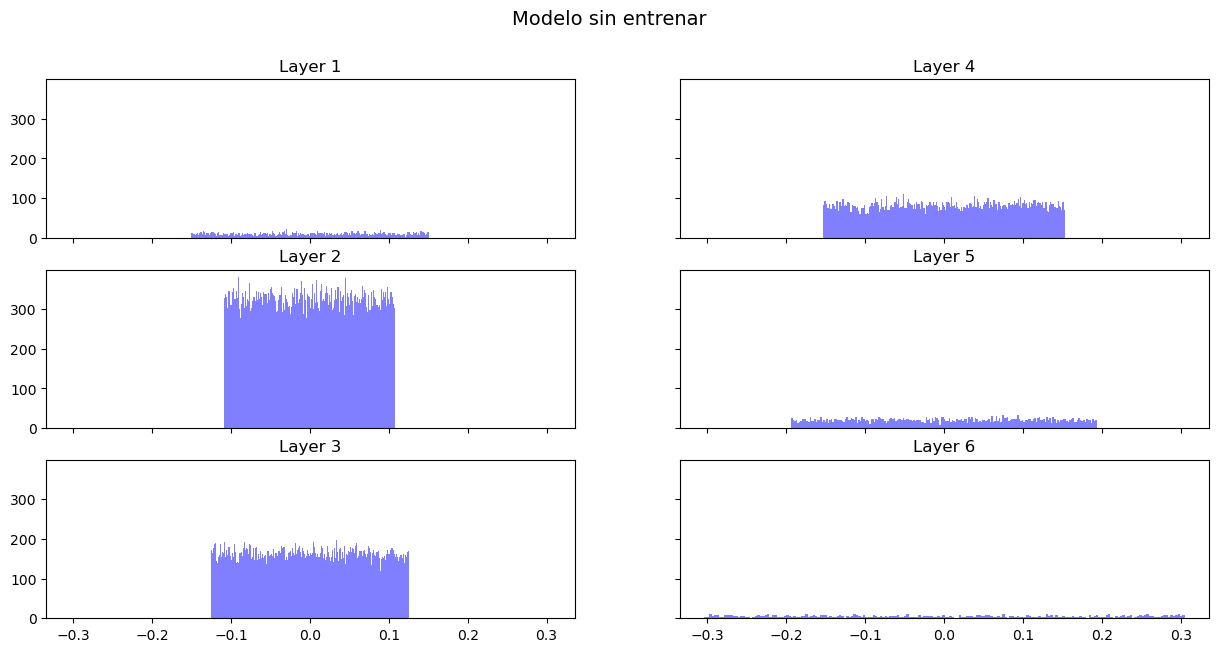

In [101]:
show_weights(model, title = "Modelo sin entrenar", bins = 200)

In [103]:
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 1000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])

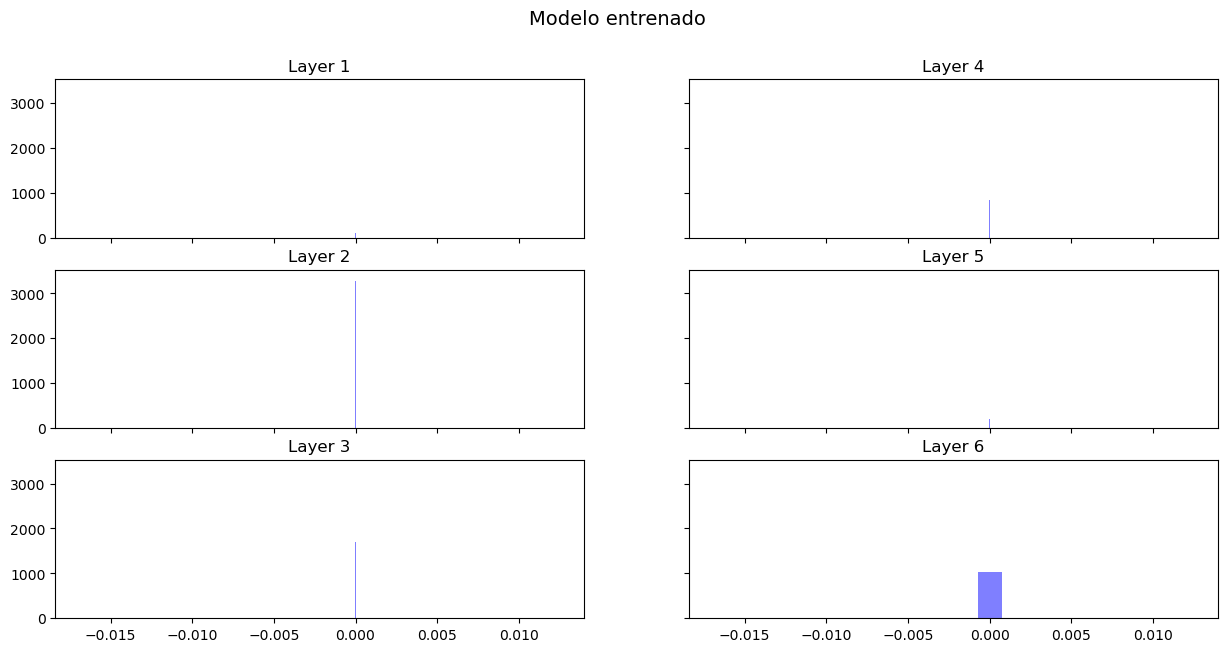

In [116]:
show_weights(model, title = "Modelo entrenado", bins = 20)

En el primer grafico podemos ver que  la distribución uniforme, tiene un comportamiento acorde a lo esperado, es decir, las frecuencias parecen ser uniformes en el intervalo, por otro lado apra el segundo grafico evidenciamos que muchos de los pesos tienden a ser 0 una vez entrenado el modelo, lo que es lógico puesto que son demasiados hiperparametros a trabajar para tan pocos datos con los que contamos. Para visualizar mejor esto lo realizamos en la siguiente sección, pues la visualización aquí era dificultosa. Pues entendemos que tenemos que ver un efecto del vanish gradient.

## 1.k Batch Normalization

Una manera propuesta de mejorar los desempeños de las redes es Batch Normalization. Entrene nuevamente su red preferida de la pregunta anterior, agregando capas de _Batch Normalization_ antes de cada función de activación. Comente sus resultados. Luego pruebe agregando capas de _Batch Normalization_ después de cada función de activación.

¿Qué realiza _Batch Normalization_ en términos matemáticos?. 

El batch normalization realiza la estandarización del batch por su promedio y desviación estandar.

$$\hat{x}=\frac{x-E[X]}{\sigma_{X}}=\frac{x-\overline{x}}{\sigma_{X}}$$

En términos de aprendizaje, ¿Qué evita la utilización de _Batch Normalization_?

Evita el gradiente desvaneciente, pues entrega outputs en regiones donde el gradiente tiene un buen comportamiento

¿Mejoran los desempeños de la red agregando _Batch Normalization_?¿Existe diferencias entre una capa de _Batch Normalization_ justo antes o justo después de la función de activación en términos de aprendizaje? Discuta.

Efectivamente mejor los desempeños de la red, esto en particular porque se trabaja mucho con tangente hiperbolica. Para el aprendizaje supone un cambio crucial el utilizar batch normalization para algunas funciones de activación no lineales, como lo son la tangente hiperbolica.

In [157]:
def make_plot(history, to_viz, title, ylim, xlim):
    to_viz = "loss"
    plt.plot(history.history[to_viz])
    plt.plot(history.history['val_'+to_viz])
    plt.title(title)
    plt.ylabel(to_viz)
    plt.xlabel('epoch')
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [158]:
X_train = x_train_1
X_val = x_val_1

input_layer = tf.keras.layers.Input(shape = (8, ))

layer_1 = tf.keras.layers.Dense(256, activation = None, kernel_regularizer = best_kernel)(input_layer)

batch_1 = tf.keras.layers.BatchNormalization()(layer_1)
layer_1 = tf.keras.activations.tanh(batch_1)

layer_2 = tf.keras.layers.Dense(256, activation = None, kernel_regularizer = best_kernel)(layer_1)

batch_2 = tf.keras.layers.BatchNormalization()(layer_2)
layer_2 = tf.keras.activations.tanh(batch_2)

layer_3 = tf.keras.layers.Dense(128, activation = None, kernel_regularizer = best_kernel)(layer_2)

batch_3 = tf.keras.layers.BatchNormalization()(layer_3)
layer_3 = tf.keras.activations.tanh(batch_3)

layer_4 = tf.keras.layers.Dense(128, activation = None, kernel_regularizer = best_kernel)(layer_3)

batch_4 = tf.keras.layers.BatchNormalization()(layer_4)
layer_4 = tf.keras.activations.tanh(batch_4)

layer_5 = tf.keras.layers.Dense(32, activation = None, kernel_regularizer = best_kernel)(layer_4)

batch_5 = tf.keras.layers.BatchNormalization()(layer_5)
layer_5 = tf.keras.activations.tanh(batch_5)

layer_6 = tf.keras.layers.Dense(32, activation = None, kernel_regularizer = best_kernel)(layer_5)

batch_6 = tf.keras.layers.BatchNormalization()(layer_6)
layer_6 = tf.keras.activations.tanh(batch_6)

output_layer = tf.keras.layers.Dense(1, activation = "sigmoid")(layer_6)

model = tf.keras.Model(inputs = input_layer, outputs = output_layer, name = "Vanishing_gradient")

model.compile(
    optimizer = SGD(learning_rate = 2e-3),
    loss = tf.losses.BinaryCrossentropy(),
    metrics = [tf.metrics.BinaryAccuracy()]
)

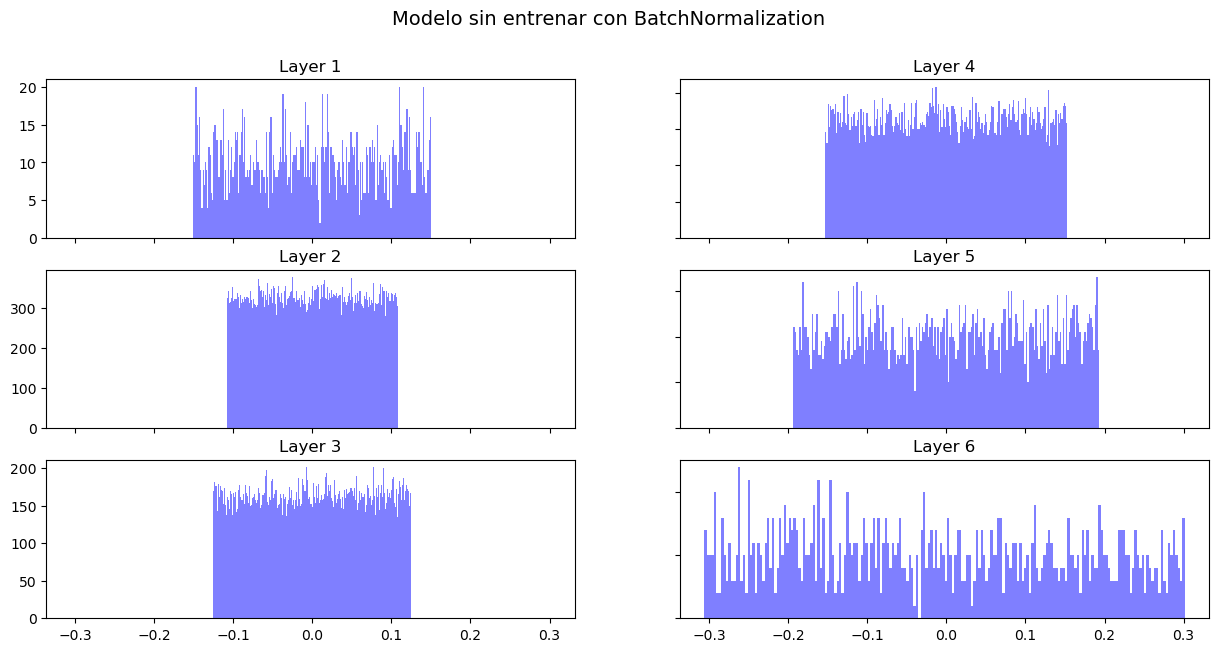

In [159]:
show_weights(model, title = "Modelo sin entrenar con BatchNormalization", bins = 200)

In [160]:
with tf.device("/GPU:0"):
    history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 1000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])

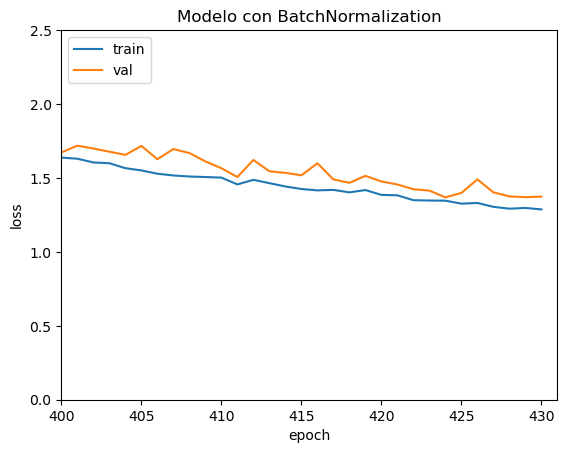

In [162]:
make_plot(history, "loss", "Modelo con BatchNormalization", (0, 2.5), (400, len(history.history["loss"])))

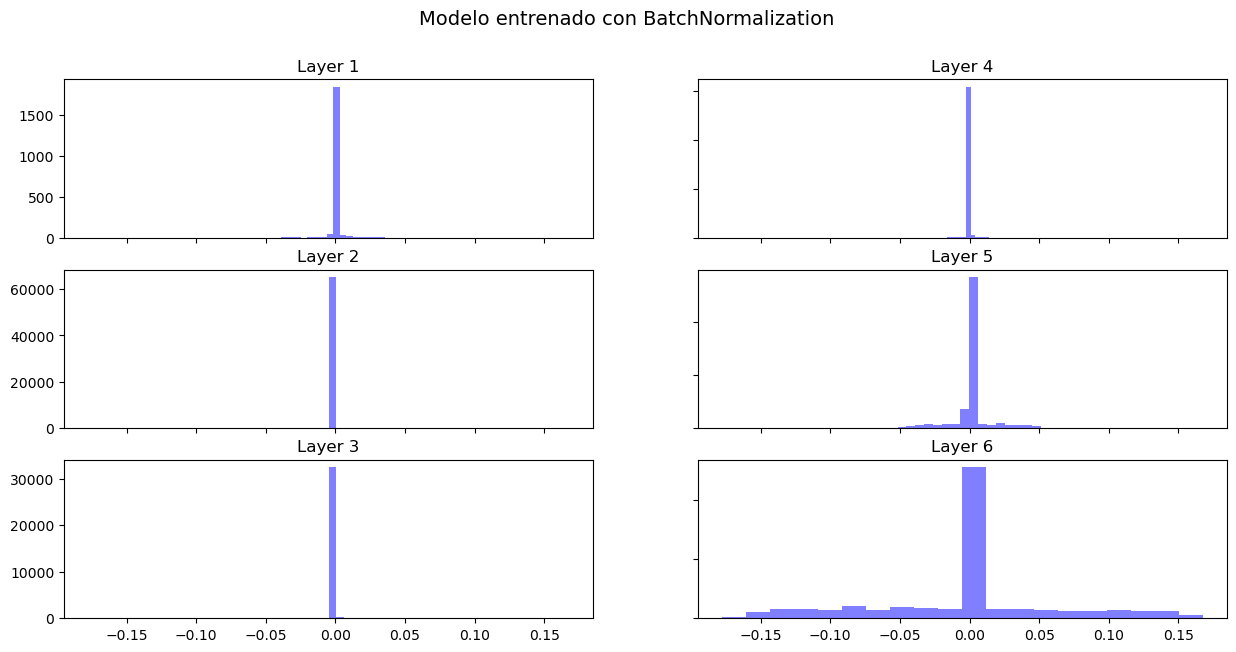

In [163]:
show_weights(model, title = "Modelo entrenado con BatchNormalization", bins = 20)

In [164]:
input_layer = tf.keras.layers.Input(shape = (8, ))

layer_1 = tf.keras.layers.Dense(256, activation = best_activation, kernel_regularizer = best_kernel)(input_layer)
layer_1 = tf.keras.layers.BatchNormalization()(layer_1)

layer_2 = tf.keras.layers.Dense(256, activation = best_activation, kernel_regularizer = best_kernel)(layer_1)
layer_2 = tf.keras.layers.BatchNormalization()(layer_2)

layer_3 = tf.keras.layers.Dense(128, activation = best_activation, kernel_regularizer = best_kernel)(layer_2)
layer_3 = tf.keras.layers.BatchNormalization()(layer_3)

layer_4 = tf.keras.layers.Dense(128, activation = best_activation, kernel_regularizer = best_kernel)(layer_3)
layer_4 = tf.keras.layers.BatchNormalization()(layer_4)

layer_5 = tf.keras.layers.Dense(32, activation = best_activation, kernel_regularizer = best_kernel)(layer_4)
layer_5 = tf.keras.layers.BatchNormalization()(layer_5)

layer_6 = tf.keras.layers.Dense(32, activation = best_activation, kernel_regularizer = best_kernel)(layer_5)
layer_6 = tf.keras.layers.BatchNormalization()(layer_6)

output_layer = tf.keras.layers.Dense(1, activation = "sigmoid")(layer_6)

model = tf.keras.Model(inputs = input_layer, outputs = output_layer, name = "Vanishing_gradient")

model.compile(
    optimizer = SGD(learning_rate = 2e-3),
    loss = tf.losses.BinaryCrossentropy(),
    metrics = [tf.metrics.BinaryAccuracy()]
)

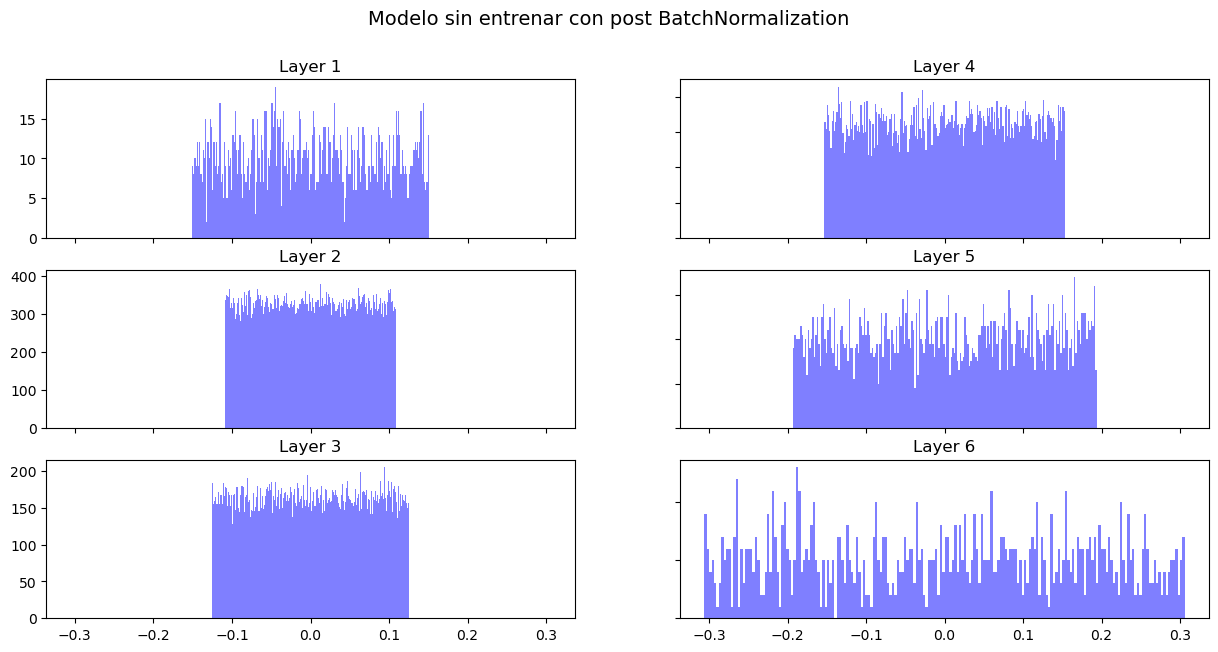

In [165]:
show_weights(model, title = "Modelo sin entrenar con post BatchNormalization", bins = 200)

In [166]:
with tf.device("/GPU:0"):
    history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 1000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])

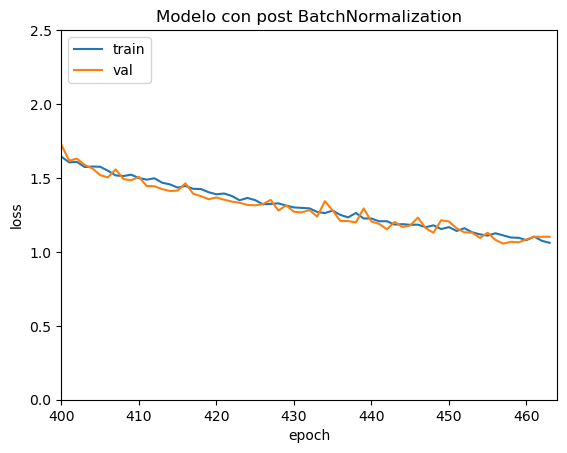

In [168]:
make_plot(history, "loss", "Modelo con post BatchNormalization", (0, 2.5), (400, len(history.history["loss"])))

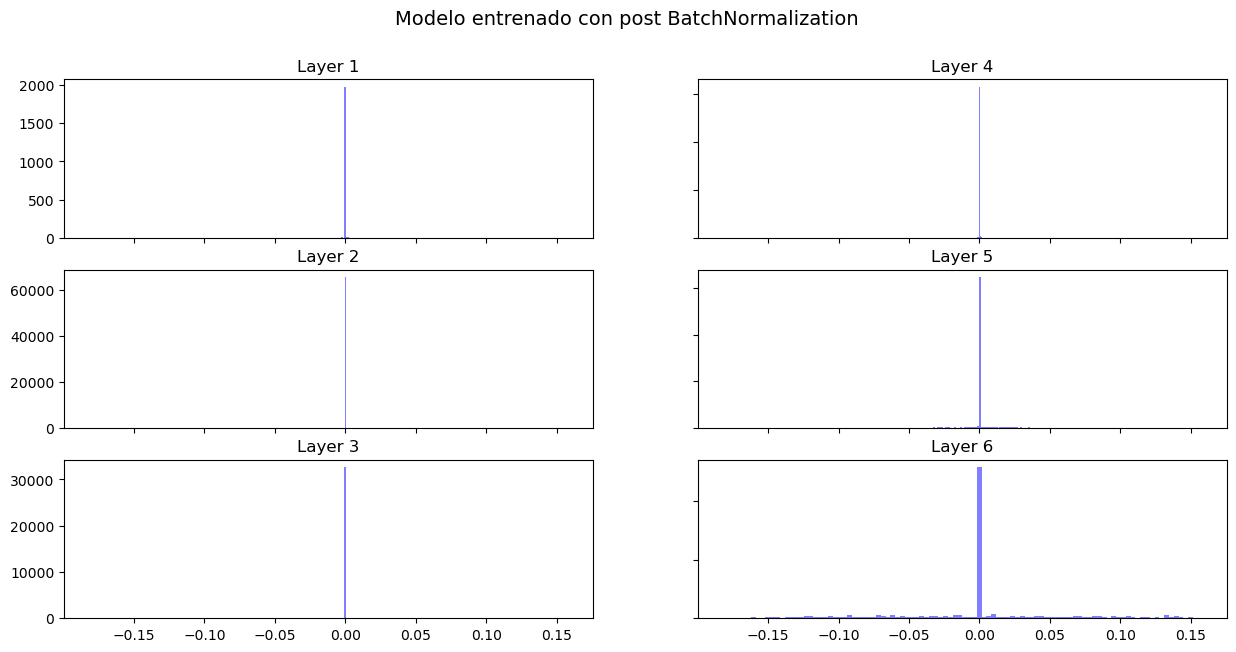

In [170]:
show_weights(model, title = "Modelo entrenado con post BatchNormalization", bins = 100)

In [171]:
input_layer = tf.keras.layers.Input(shape = (8, ))

layer_1 = tf.keras.layers.Dense(256, activation = best_activation, kernel_regularizer = best_kernel, kernel_initializer = "glorot_normal")(input_layer)
layer_1 = tf.keras.layers.BatchNormalization()(layer_1)

layer_2 = tf.keras.layers.Dense(256, activation = best_activation, kernel_regularizer = best_kernel, kernel_initializer = "glorot_normal")(layer_1)
layer_2 = tf.keras.layers.BatchNormalization()(layer_2)

layer_3 = tf.keras.layers.Dense(128, activation = best_activation, kernel_regularizer = best_kernel, kernel_initializer = "glorot_normal")(layer_2)
layer_3 = tf.keras.layers.BatchNormalization()(layer_3)

layer_4 = tf.keras.layers.Dense(128, activation = best_activation, kernel_regularizer = best_kernel, kernel_initializer = "glorot_normal")(layer_3)
layer_4 = tf.keras.layers.BatchNormalization()(layer_4)

layer_5 = tf.keras.layers.Dense(32, activation = best_activation, kernel_regularizer = best_kernel, kernel_initializer = "glorot_normal")(layer_4)
layer_5 = tf.keras.layers.BatchNormalization()(layer_5)

layer_6 = tf.keras.layers.Dense(32, activation = best_activation, kernel_regularizer = best_kernel, kernel_initializer = "glorot_normal")(layer_5)
layer_6 = tf.keras.layers.BatchNormalization()(layer_6)

output_layer = tf.keras.layers.Dense(1, activation = "sigmoid")(layer_6)

model = tf.keras.Model(inputs = input_layer, outputs = output_layer, name = "Vanishing_gradient")

model.compile(
    optimizer = SGD(learning_rate = 2e-3),
    loss = tf.losses.BinaryCrossentropy(),
    metrics = [tf.metrics.BinaryAccuracy()]
)

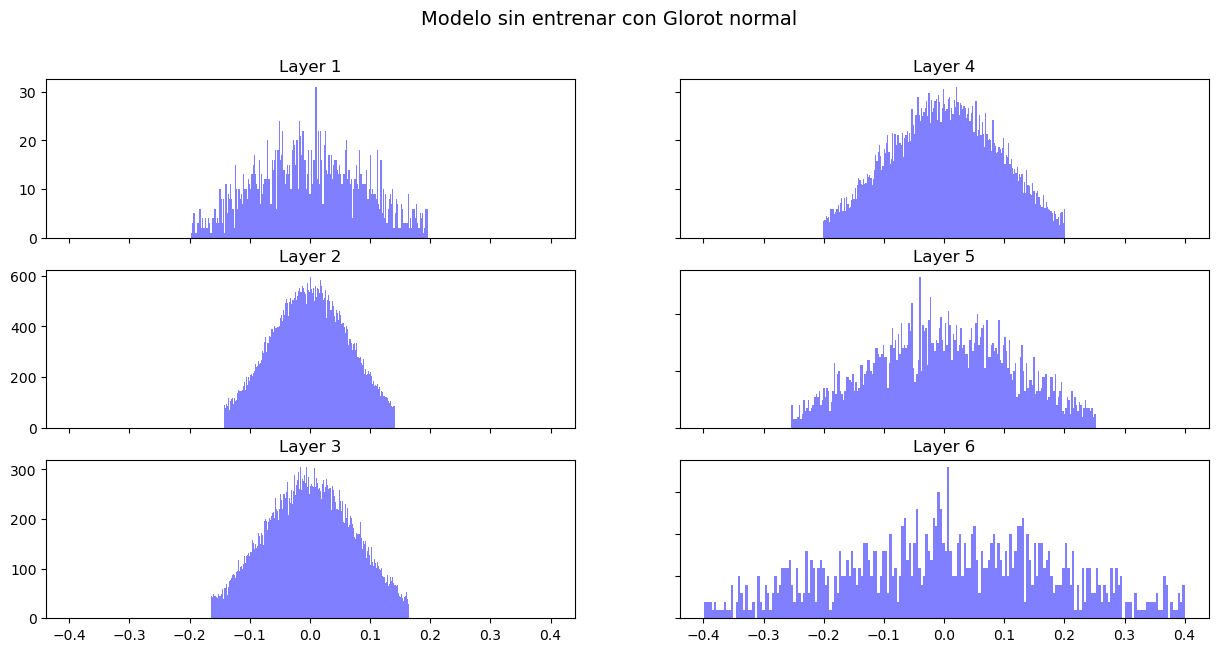

In [173]:
show_weights(model, title = "Modelo sin entrenar con Glorot normal", bins = 200)

In [174]:
with tf.device("/GPU:0"):
    history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])

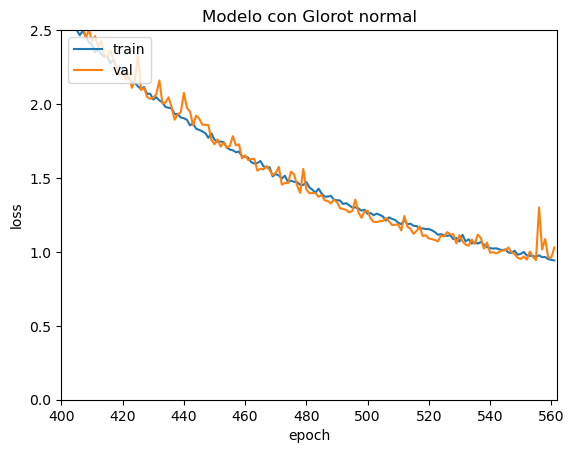

In [175]:
make_plot(history, "loss", "Modelo con Glorot normal", (0, 2.5), (400, len(history.history["loss"])))

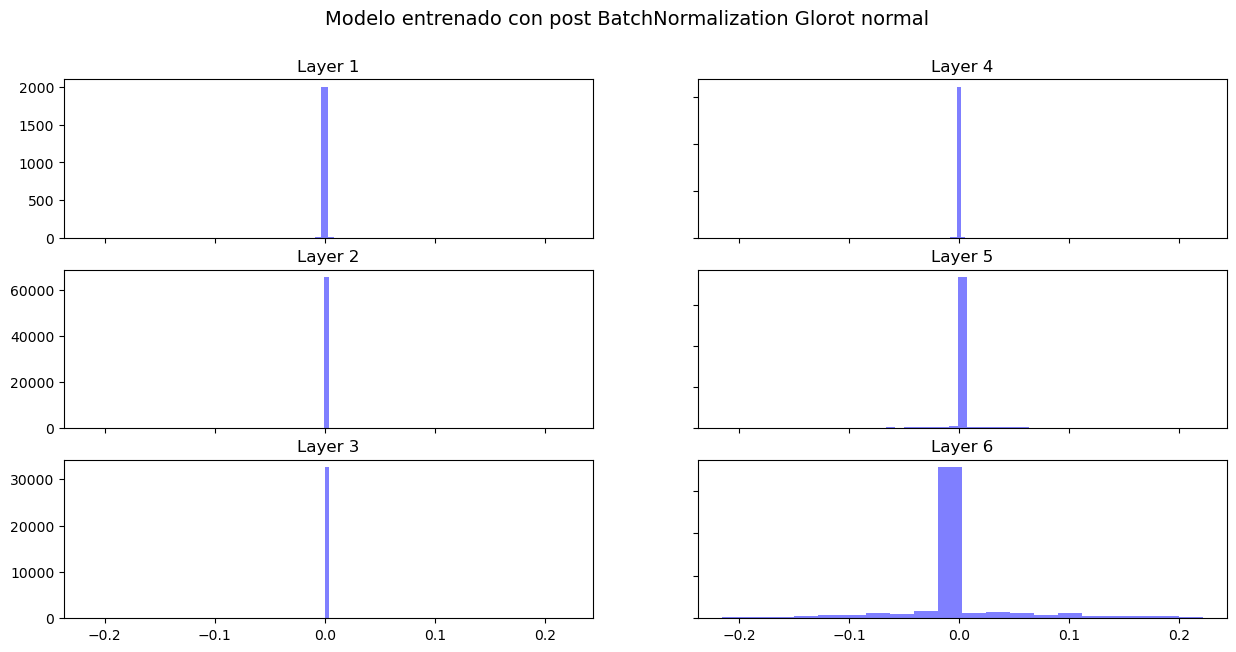

In [176]:
show_weights(model, title = "Modelo entrenado con post BatchNormalization Glorot normal", bins = 20)

In [189]:
input_layer = tf.keras.layers.Input(shape = (8, ))

kernel = tf.keras.initializers.random_normal(mean = 1.1, stddev = 0.5, seed = 2022)

layer_1 = tf.keras.layers.Dense(256, activation = best_activation, kernel_regularizer = best_kernel, kernel_initializer = kernel)(input_layer)
layer_1 = tf.keras.layers.BatchNormalization()(layer_1)

layer_2 = tf.keras.layers.Dense(256, activation = best_activation, kernel_regularizer = best_kernel, kernel_initializer = kernel)(layer_1)
layer_2 = tf.keras.layers.BatchNormalization()(layer_2)

layer_3 = tf.keras.layers.Dense(128, activation = best_activation, kernel_regularizer = best_kernel, kernel_initializer = kernel)(layer_2)
layer_3 = tf.keras.layers.BatchNormalization()(layer_3)

layer_4 = tf.keras.layers.Dense(128, activation = best_activation, kernel_regularizer = best_kernel, kernel_initializer = kernel)(layer_3)
layer_4 = tf.keras.layers.BatchNormalization()(layer_4)

layer_5 = tf.keras.layers.Dense(32, activation = best_activation, kernel_regularizer = best_kernel, kernel_initializer = kernel)(layer_4)
layer_5 = tf.keras.layers.BatchNormalization()(layer_5)

layer_6 = tf.keras.layers.Dense(32, activation = best_activation, kernel_regularizer = best_kernel, kernel_initializer = kernel)(layer_5)
layer_6 = tf.keras.layers.BatchNormalization()(layer_6)

output_layer = tf.keras.layers.Dense(1, activation = "sigmoid")(layer_6)

model = tf.keras.Model(inputs = input_layer, outputs = output_layer, name = "Vanishing_gradient")

model.compile(
    optimizer = SGD(learning_rate = 2e-3),
    loss = tf.losses.BinaryCrossentropy(),
    metrics = [tf.metrics.BinaryAccuracy()]
)

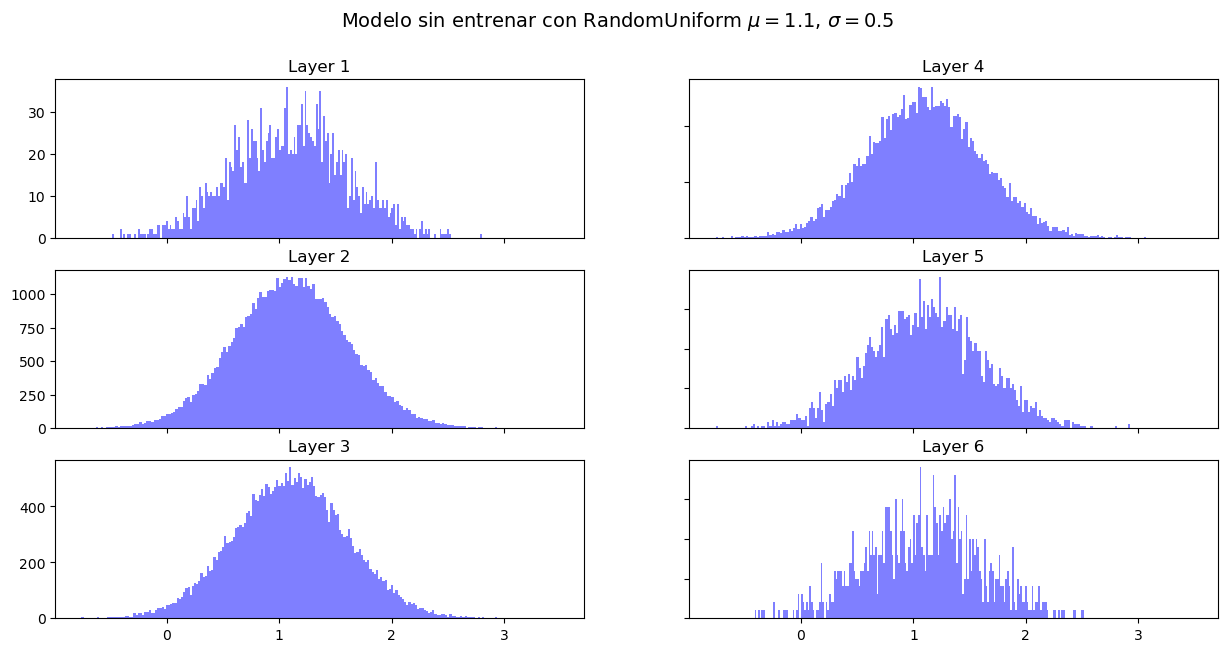

In [191]:
show_weights(model, title = "Modelo sin entrenar con RandomUniform $\mu = 1.1$, $\sigma = 0.5$", bins = 200)

In [211]:
with tf.device("/GPU:0"):
    history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])

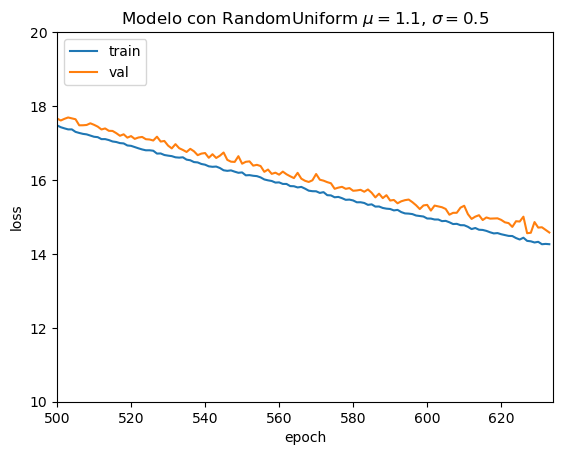

In [217]:
make_plot(history, "loss", "Modelo con RandomUniform $\mu = 1.1$, $\sigma = 0.5$", (10, 20), (500, len(history.history["loss"])))

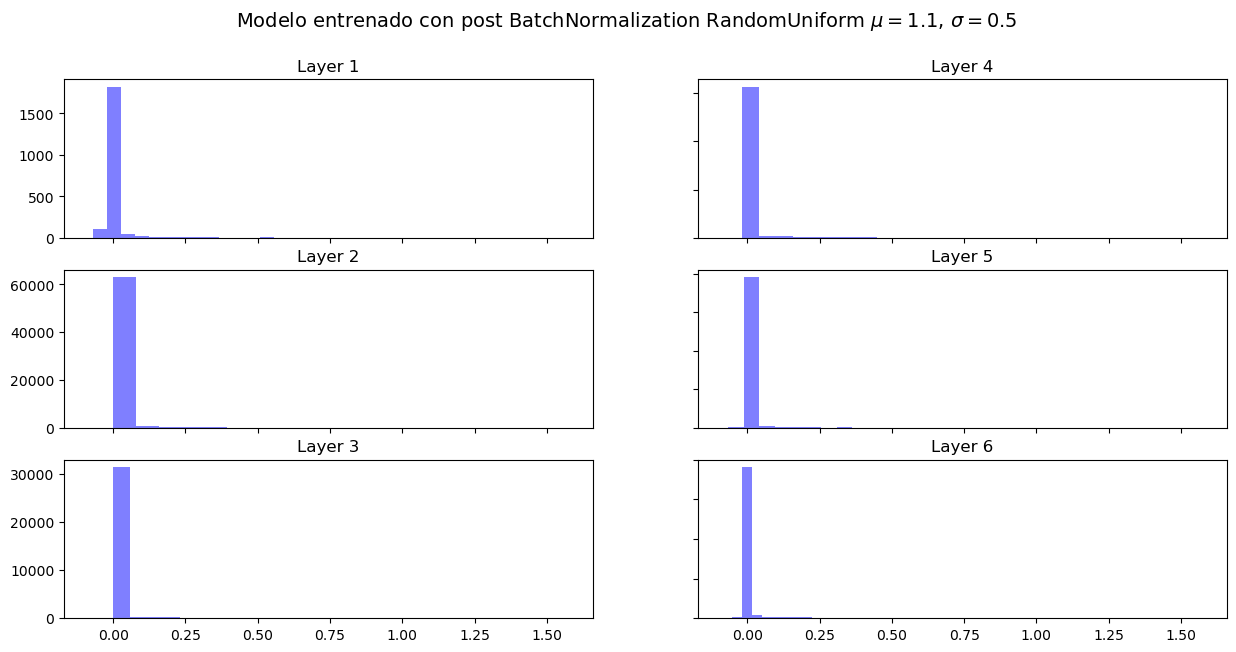

In [218]:
show_weights(model, title = "Modelo entrenado con post BatchNormalization RandomUniform $\mu = 1.1$, $\sigma = 0.5$", bins = 20)

Utilizar otras inicializaciones de pesos puede llevar a mejores convergencias, pero se corre el riesgo de generar una convergencia más lenta como se puede apreciar anteriormente, pero de igual manera, el inicializar pesos cercanos a 0 en un modelo sobreparametrizado como el que se esta trabajando, nos lleva a converger más rápido, pues hay muchas neuronas que deben apagarse para evitar el overfitting.

## 1.l Otros Optimizadores

Utilizando la arquitectura de red que mejor se haya desempeñado a lo largo de la tarea, entrene esta red utilizando un optimizador distinto al gradiente descendente estocástico. Pruebe al menos 2 optimizadores implementados en keras (puede utilizar Adam, AdaGrad, AdaDelta, RMSprop, entre otros), también puede probar modificando los parámetros que no hemos utilizado del gradiente descendente estocástico (momentum, momentum de Nesterov...).

Note que por las inicializaciones por defecto de los pesos de las capas y la naturaleza de los datos en cuestión, puede ocurrir que para los valores defecto de algunos optimizadores la red diverga en las primeras iteraciones. Para fijar los parámeros de los optimizadores debe importarlos desde `keras.optimizers` y pasar el objeto con los parámetros deseados al método `.compile` de su modelo. En cambio si con los valores usuales basta, algunos optimizadores pueden pasarse como `string` a `.compile`.

Compare como se desempeñan estos optimizadores con la versión utilizada anteriormente, considerando los tiempos de entrenamiento y el desempeño final alcanzado. Apoyese de gráficos. 

In [ ]:
opt = Adam(lr=0.0004, decay=1e-10)
ANN.compile(loss='binary_crossentropy', optimizer = optimizer_discriminator, metrics=['accuracy'])

In [220]:
def make_model(opt):
    input_layer = tf.keras.layers.Input(shape = (8, ))

    layer_1 = tf.keras.layers.Dense(16, activation = best_activation, kernel_regularizer = best_kernel)(input_layer)
    output_layer = tf.keras.layers.Dense(1, activation = "sigmoid")(layer_1)

    model = tf.keras.Model(inputs = input_layer, outputs = output_layer, name = "Final")

    model.compile(
        optimizer = opt,
        loss = tf.losses.BinaryCrossentropy(),
        metrics = [tf.metrics.BinaryAccuracy()]
    )
    return model

In [225]:
%%timeit
model = make_model(SGD(learning_rate = 2e-3))
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])

2min 21s ± 13.4 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [228]:
%%timeit
model = make_model(tf.keras.optimizers.Adam(learning_rate = 2e-3, decay = 1e-8))
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])

8.01 s ± 1.84 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [230]:
%%timeit
model = make_model(tf.keras.optimizers.Adagrad(learning_rate = 2e-3, epsilon = 1e-8))
model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])

7min 9s ± 1min 13s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Desde el punto de vista computacional es evidente que ADAM genera un mejor desempeño, es sorprendentemente alta la diferencia, seguido por SGD y finalmente Adagrad.

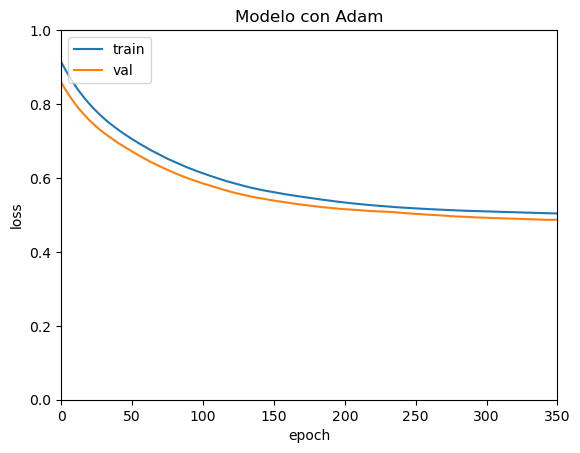

In [238]:
model = make_model(tf.keras.optimizers.Adam(learning_rate = 2e-4, decay = 1e-8))
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])
make_plot(history, "loss", "Modelo con Adam", (0, 1), (0, len(history.history["loss"])))

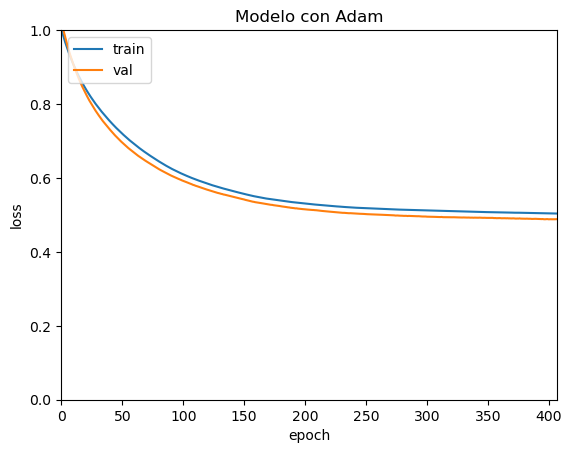

In [239]:
model = make_model(tf.keras.optimizers.Adam(learning_rate = 2e-4, decay = 1e-6))
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])
make_plot(history, "loss", "Modelo con Adam", (0, 1), (0, len(history.history["loss"])))

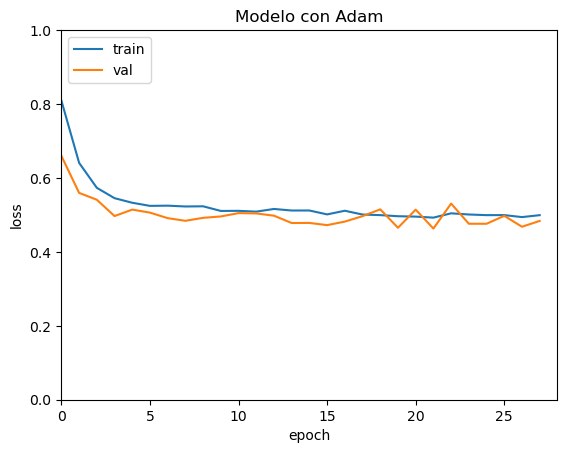

In [240]:
model = make_model(tf.keras.optimizers.Adam(learning_rate = 2e-2, decay = 1e-10))
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])
make_plot(history, "loss", "Modelo con Adam", (0, 1), (0, len(history.history["loss"])))

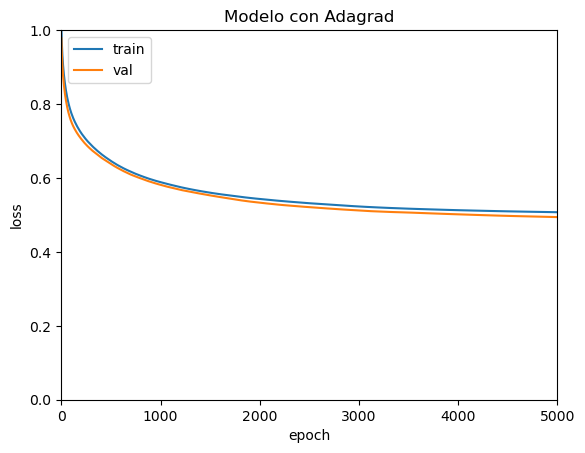

In [241]:
model = make_model(tf.keras.optimizers.Adagrad(learning_rate = 2e-3, epsilon = 1e-8))
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])
make_plot(history, "loss", "Modelo con Adagrad", (0, 1), (0, len(history.history["loss"])))

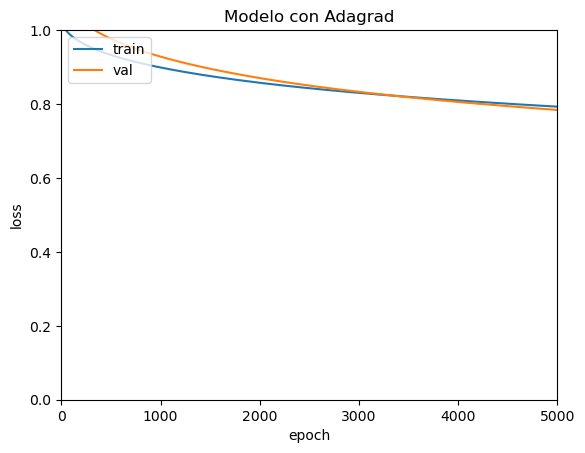

In [242]:
model = make_model(tf.keras.optimizers.Adagrad(learning_rate = 2e-4, epsilon = 1e-9))
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])
make_plot(history, "loss", "Modelo con Adagrad", (0, 1), (0, len(history.history["loss"])))

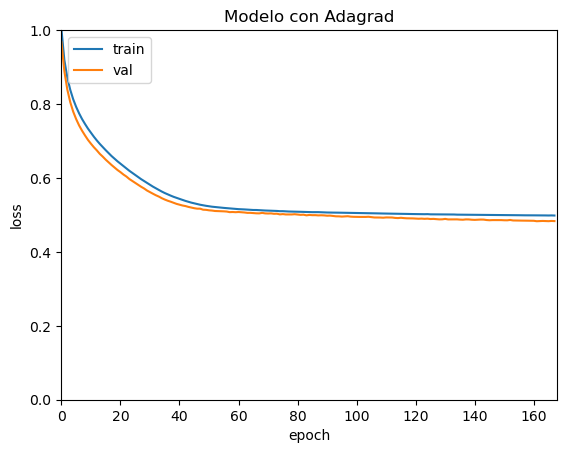

In [243]:
model = make_model(tf.keras.optimizers.Adagrad(learning_rate = 2e-2, epsilon = 1e-7))
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 6)])
make_plot(history, "loss", "Modelo con Adagrad", (0, 1), (0, len(history.history["loss"])))

el modelo con Adam es el que mejor se desempeño, para un gran gradiente al principio conseguimos lo esperado, que es una rápida reducción del error en las primeras epoch, para tener una cierta inestabilidad que se va controlando al tener un weight decay al pasar el tiempo. De manera similar pero mucho menos significativa tenemos una gran reducción en la función de perdida para Adagrad.

## 1.m Testing 

Finalmente, luego de entrenar todos estos modelos estamos en condiciones de probar que tan bien fue nuestro desempeño. Para esto utilice el modelo en el cual obtuvo el mejor desempeño en validación y calcule el error de la predicción realizada sobre el _Test set_. Puede utilizar el metodo `.predict` de su modelo. 

In [244]:
model = make_model(tf.keras.optimizers.Adam(learning_rate = 2e-4, decay = 1e-6))
history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = 5000, verbose = 0, callbacks = [tf.keras.callbacks.EarlyStopping(patience = 10)])

In [256]:
tf.keras.metrics.binary_accuracy(y_test.values, np.round(model.predict(x_test_1, verbose = 0)).flatten()).numpy()

0.74025977

¿Qué tan bien se desempeñaría su modelo en un caso real en vista de lo anterior? 
$\textit{R:}$ Contando con un binary acuracy de 0.7403 podemos decir que el desempeño de la red neuronal es satisfactorio, pues pareciera contar con una buena capacidad de generalización, aunque las comparativas tienen más sentido al ser relativas con respecto a otros intentos externos, esta metrica en el test set consideramos que es aceptable y tiene un buen desempeño.